In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

plt.rc('font', family='NanumGothic')

#경로 맞게설정하기 
DATA_PATH = r"C:\Users\jaeyeon\OneDrive - Chonnam National University\미니프로젝트\백화점"

train_trans = pd.read_csv(f"{DATA_PATH}/store_train_transactions.csv")
test_trans = pd.read_csv(f"{DATA_PATH}/store_test_transactions.csv")
store_train = pd.read_csv(f"{DATA_PATH}/store_train.csv")
store_submission = pd.read_csv(f"{DATA_PATH}/store_submission.csv")

train_trans.shape , test_trans.shape, store_train.shape, store_submission.shape

((523105, 7), (441196, 7), (14940, 2), (12225, 2))

In [129]:
train_trans["구매일시"] = pd.to_datetime(train_trans["구매일시"])
test_trans["구매일시"] = pd.to_datetime(test_trans["구매일시"])

train_ft = store_train.copy()
test_ft = store_submission.iloc[:,:1].copy()

In [130]:
merged_df = train_trans.merge(store_train, how='left', on='ID')#다음 데이터는 하단과 같이 EDA를 위해 소유데이터 원본으로 복구시킴
# merged_df.to_excel('원본데이터.xlsx',index=False)
merged_df.head()
# merged_df.to_csv('원본데이터.csv')
# merged_df.to_excel('원본데이터.xlsx',index=False)

,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격,target
0,train_13219,2004-05-01 09:40:00,A144000,공산품파트,차류,5100,59700,0.0
1,train_5590,2004-05-01 09:40:00,A144000,잡화파트,화장잡화,5101,17000,0.0
2,train_7200,2004-05-01 10:20:00,A112000,공산품,용기보증,5100,34937,0.0
3,train_3010,2004-05-01 10:30:00,A373000,아동_스포츠,아동복,5105,19000,0.0
4,train_10851,2004-05-01 10:30:00,A112000,가정용품,전화기_카세트,5110,215000,0.0


In [ ]:
merged_df.to_excel('원본데이터_가공.xlsx',index=False)

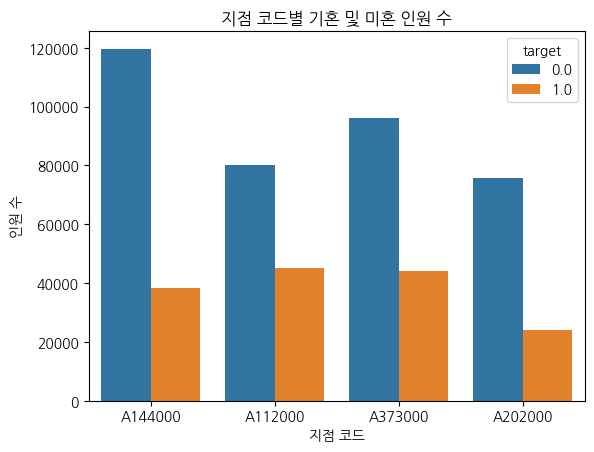

In [7]:
sns.countplot(data=merged_df, x='지점코드', hue='target')

plt.title('지점 코드별 기혼 및 미혼 인원 수')
plt.xlabel('지점 코드')
plt.ylabel('인원 수')
plt.show()


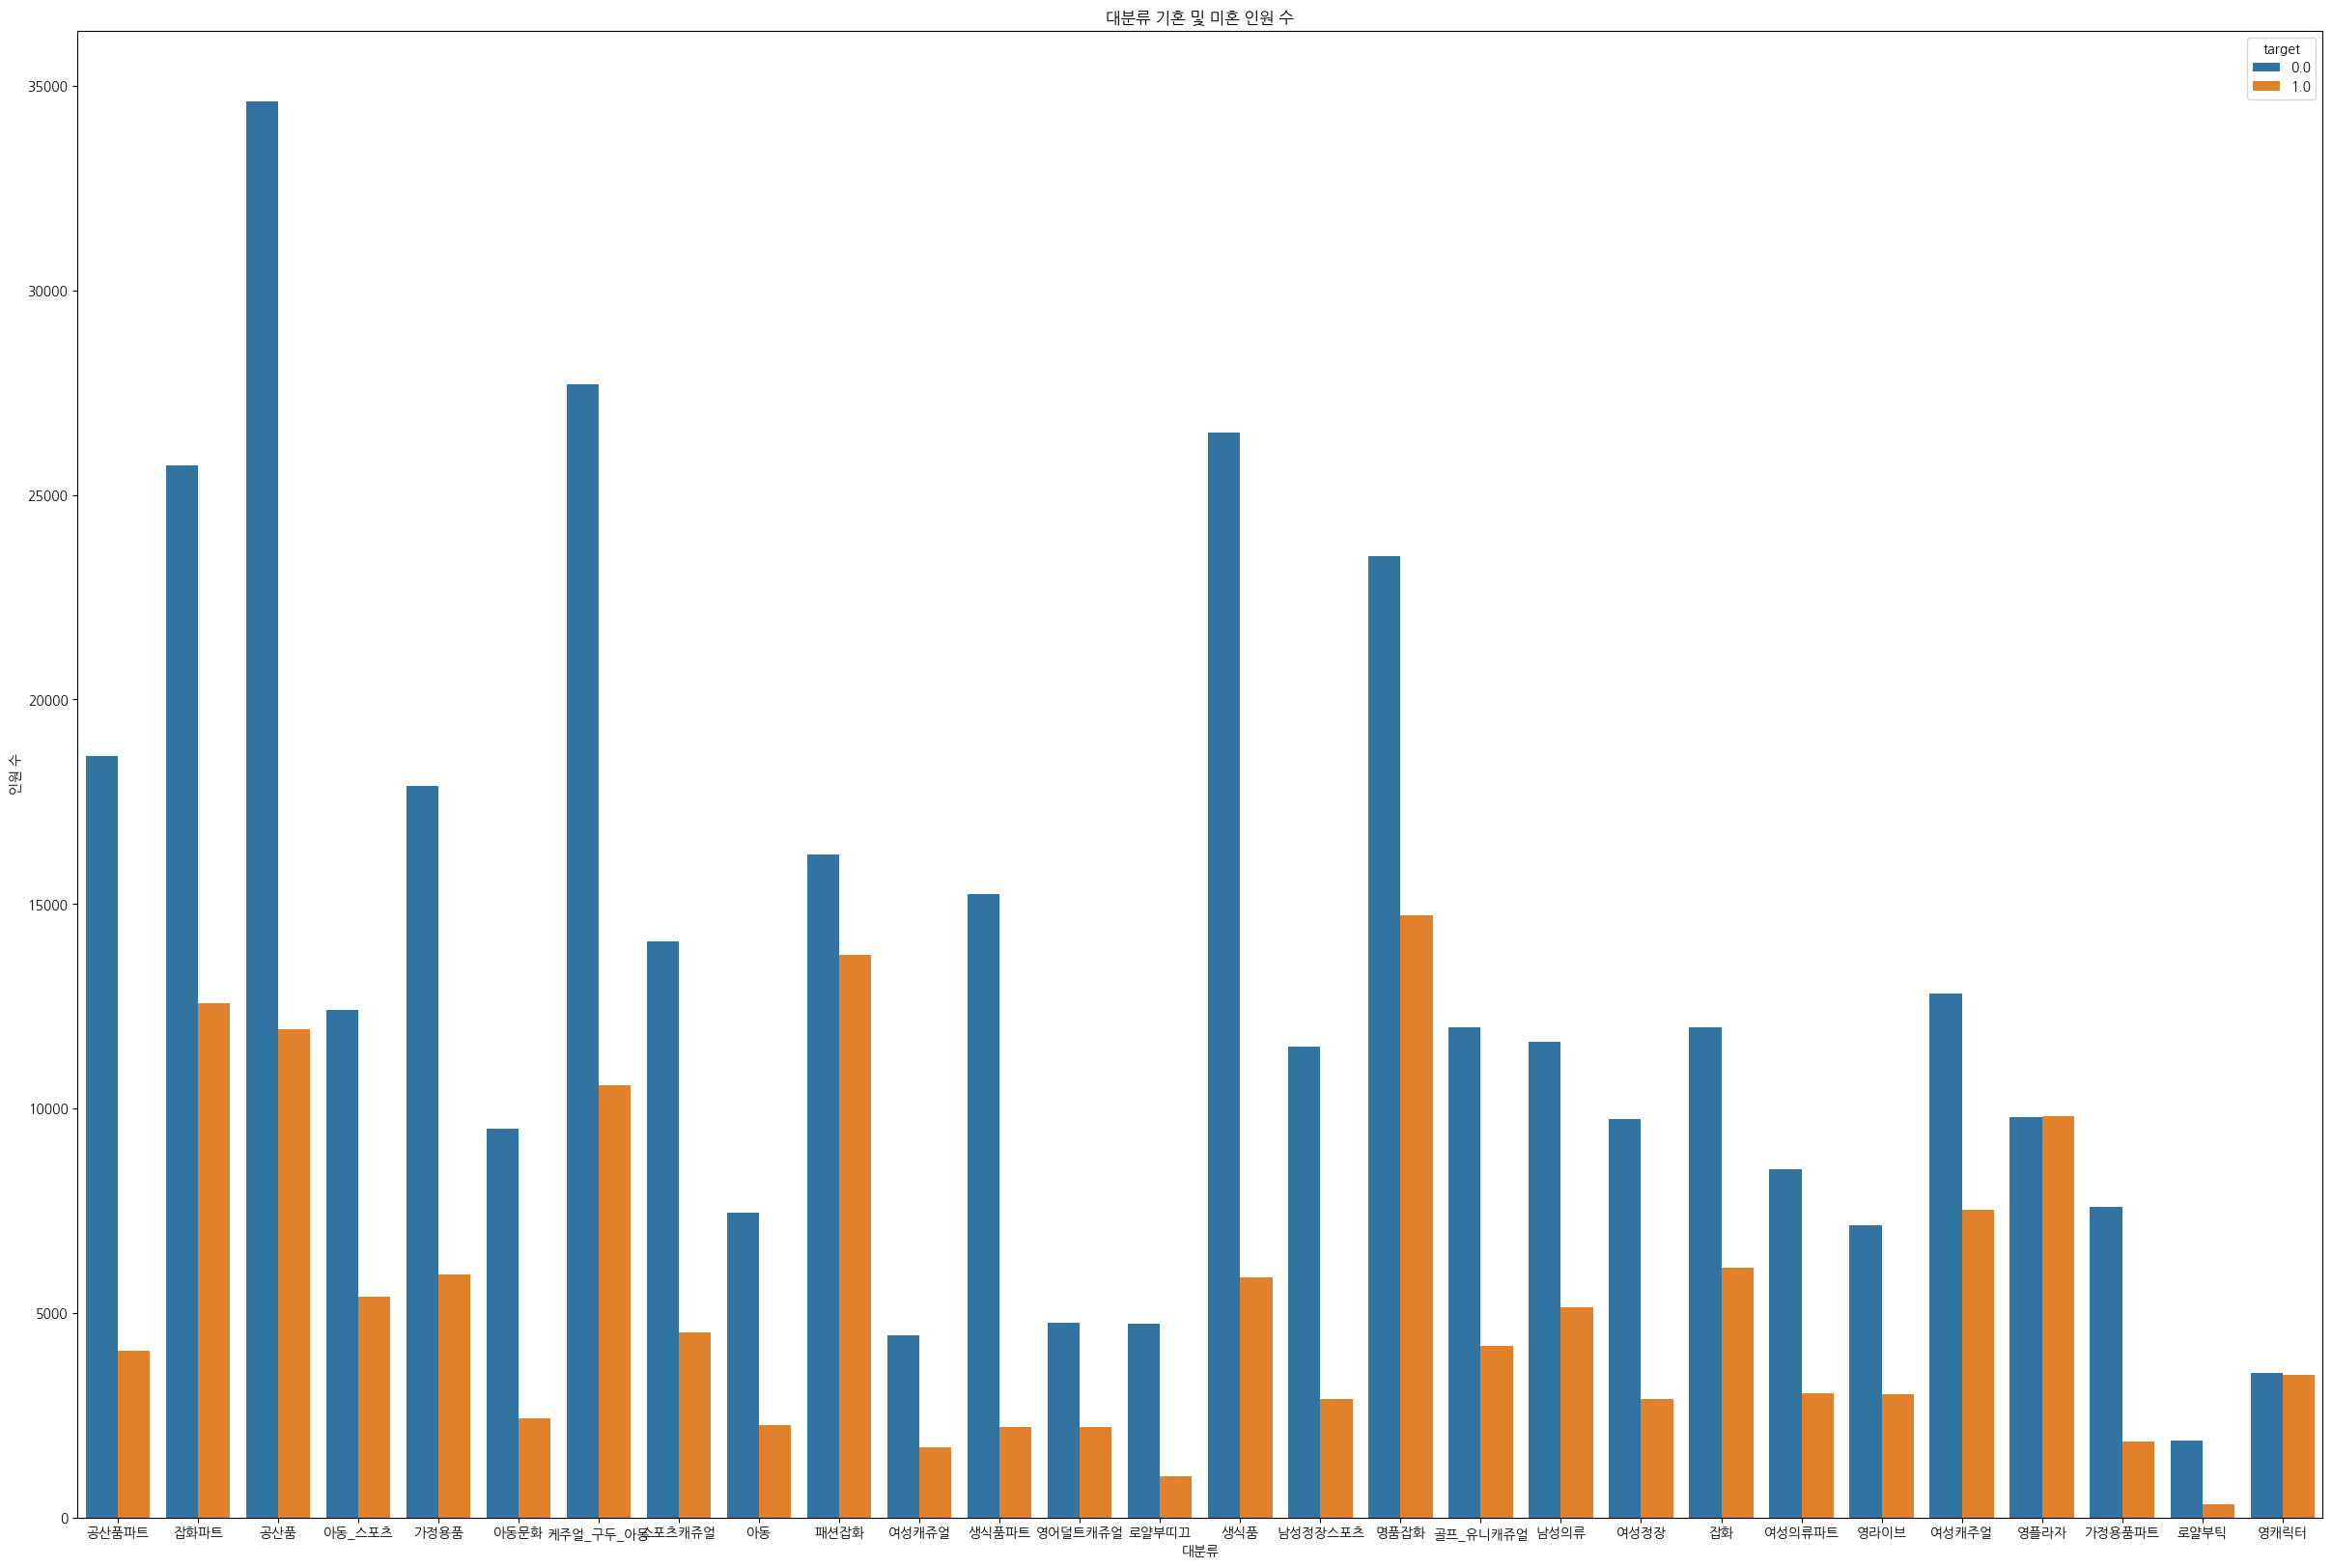

In [8]:
plt.figure(figsize=(30,20))
sns.countplot(data=merged_df, x='대분류', hue='target')

plt.title('대분류 기혼 및 미혼 인원 수')
plt.xlabel('대분류')
plt.ylabel('인원 수')
plt.show()


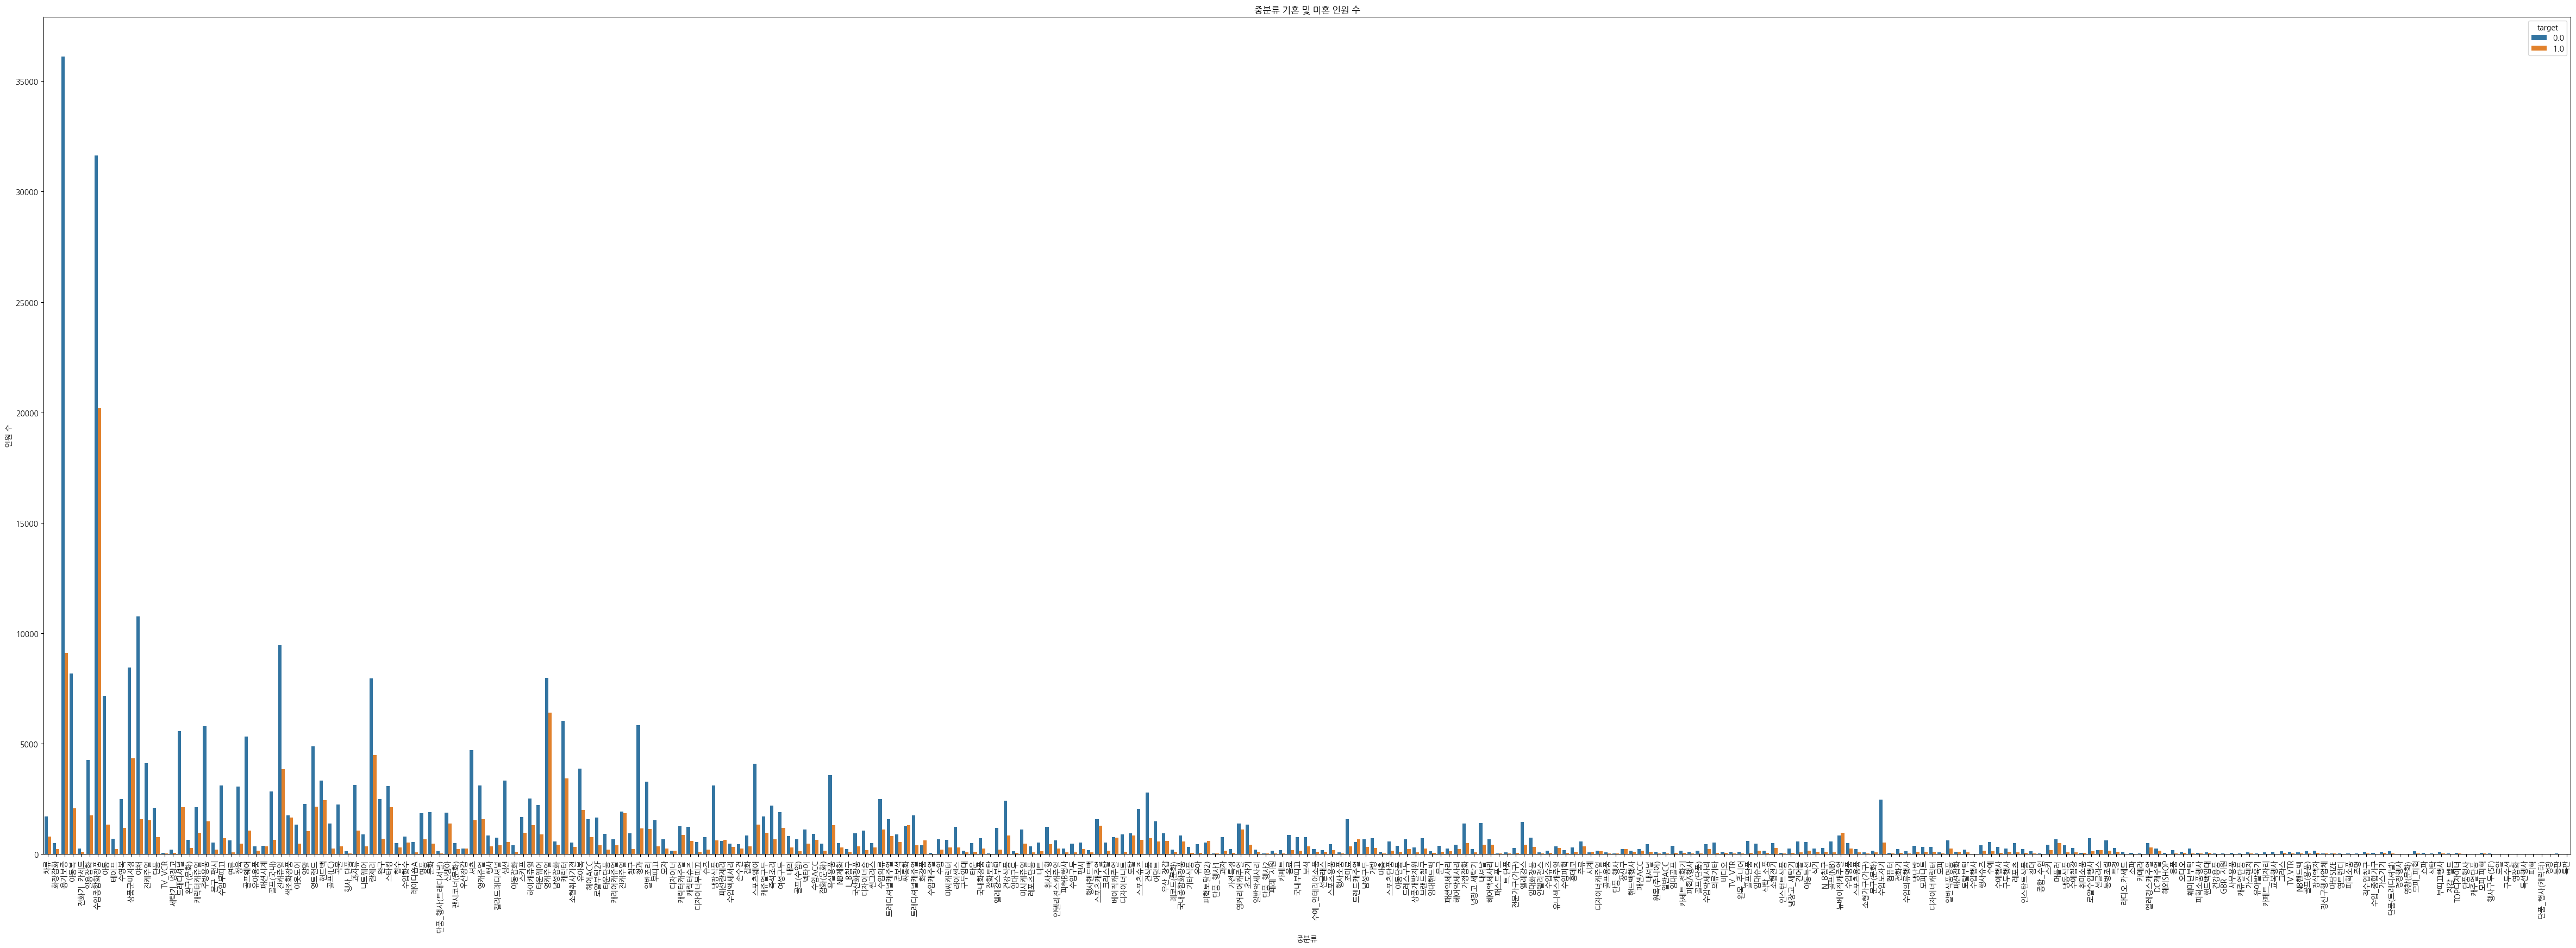

In [9]:
plt.figure(figsize=(60,20))
sns.countplot(data=merged_df, x='중분류', hue='target')

plt.title('중분류 기혼 및 미혼 인원 수')
plt.xticks(rotation=90)
plt.xlabel('중분류')
plt.ylabel('인원 수')
plt.show()


In [12]:
15000/3000

0.5

In [33]:
# 각 중분류별로 target 값이 1인 경우와 0인 경우의 수를 계산
target_counts = merged_df.groupby(['중분류', 'target']).size().unstack(fill_value=0)

# 1 대 0의 비율 계산 (0인 경우가 0이면, 비율을 NaN으로 설정)
target_ratio = target_counts[1] / target_counts[0]
target_ratio[target_counts[0] == 0] = float('nan')

# 비율이 0.3 이하인 중분류 아이템 선택
selected_categories = target_ratio[target_ratio <= 0.3].index.tolist()
selected_categories


['GBR  지원',
 'TV.VTR',
 'TV_VTR',
 '가스렌지',
 '가전특정',
 '건강용품',
 '건식품',
 '건어물',
 '곡물',
 '골프(LC)',
 '골프(NB)',
 '골프(국내)',
 '골프(단품)',
 '골프(수입)',
 '골프(용품)',
 '골프단품',
 '골프웨어',
 '과자',
 '교복행사',
 '구두수선',
 '국내부띠끄',
 '기타식품',
 '내셔날',
 '내셔널',
 '냉난방',
 '냉동식품',
 '냉장고_세탁기',
 '냉장식품',
 '니트',
 '단품(트래디셔널)',
 '단품행사',
 '디자이너니트',
 '디자이너부띠끄',
 '디자이너숍',
 '디자이너캐릭터',
 '라디오.카세트',
 '라이센스',
 '레이디숍A',
 '레포츠',
 '레포츠단품',
 '로얄부틱2F',
 '로얄수입행사',
 '마춤',
 '면류',
 '모피.피혁',
 '모피_피혁',
 '문구',
 '문화',
 '부띠끄',
 '부띠끄행사',
 '상품개발지원',
 '생선',
 '세탁기_냉장고',
 '소파',
 '소형가구(가구)',
 '쇼파',
 '수예',
 '수예침장',
 '수예행사',
 '수입_종합가구',
 '수입구두',
 '수입도자기',
 '수입부띠끄',
 '수입슈즈',
 '수입캐주얼',
 '수입피혁',
 '슈즈',
 '스포츠단품',
 '아동',
 '아동단품',
 '아동복',
 '아동잡화',
 '아동특선',
 '야채',
 '엘레강스',
 '엘레강스부틱',
 '영잡화',
 '완구',
 '용기보증',
 '용품',
 '원목(주니어)',
 '유아',
 '음료',
 '의류기타',
 '인스탄트식품',
 '임대골프',
 '잡화토탈',
 '전문가구(가구)',
 '전화기',
 '정육',
 '조명',
 '조미료',
 '종합_수입',
 '주방용품',
 '지갑_벨트',
 '직수입침구',
 '청과',
 '침구',
 '침대',
 '카세트_전화기',
 '카페트',
 '카페트_대자리',
 '캐쥬얼단품',
 '크리스탈',
 '타운',
 '타운단품',
 '통병조림',
 '통판',
 '트래

In [34]:
merged_df['총구매가격']=merged_df['ID'].map(merged_df.groupby('ID')['구매가격'].agg(lambda x :sum(x)).fillna(0))

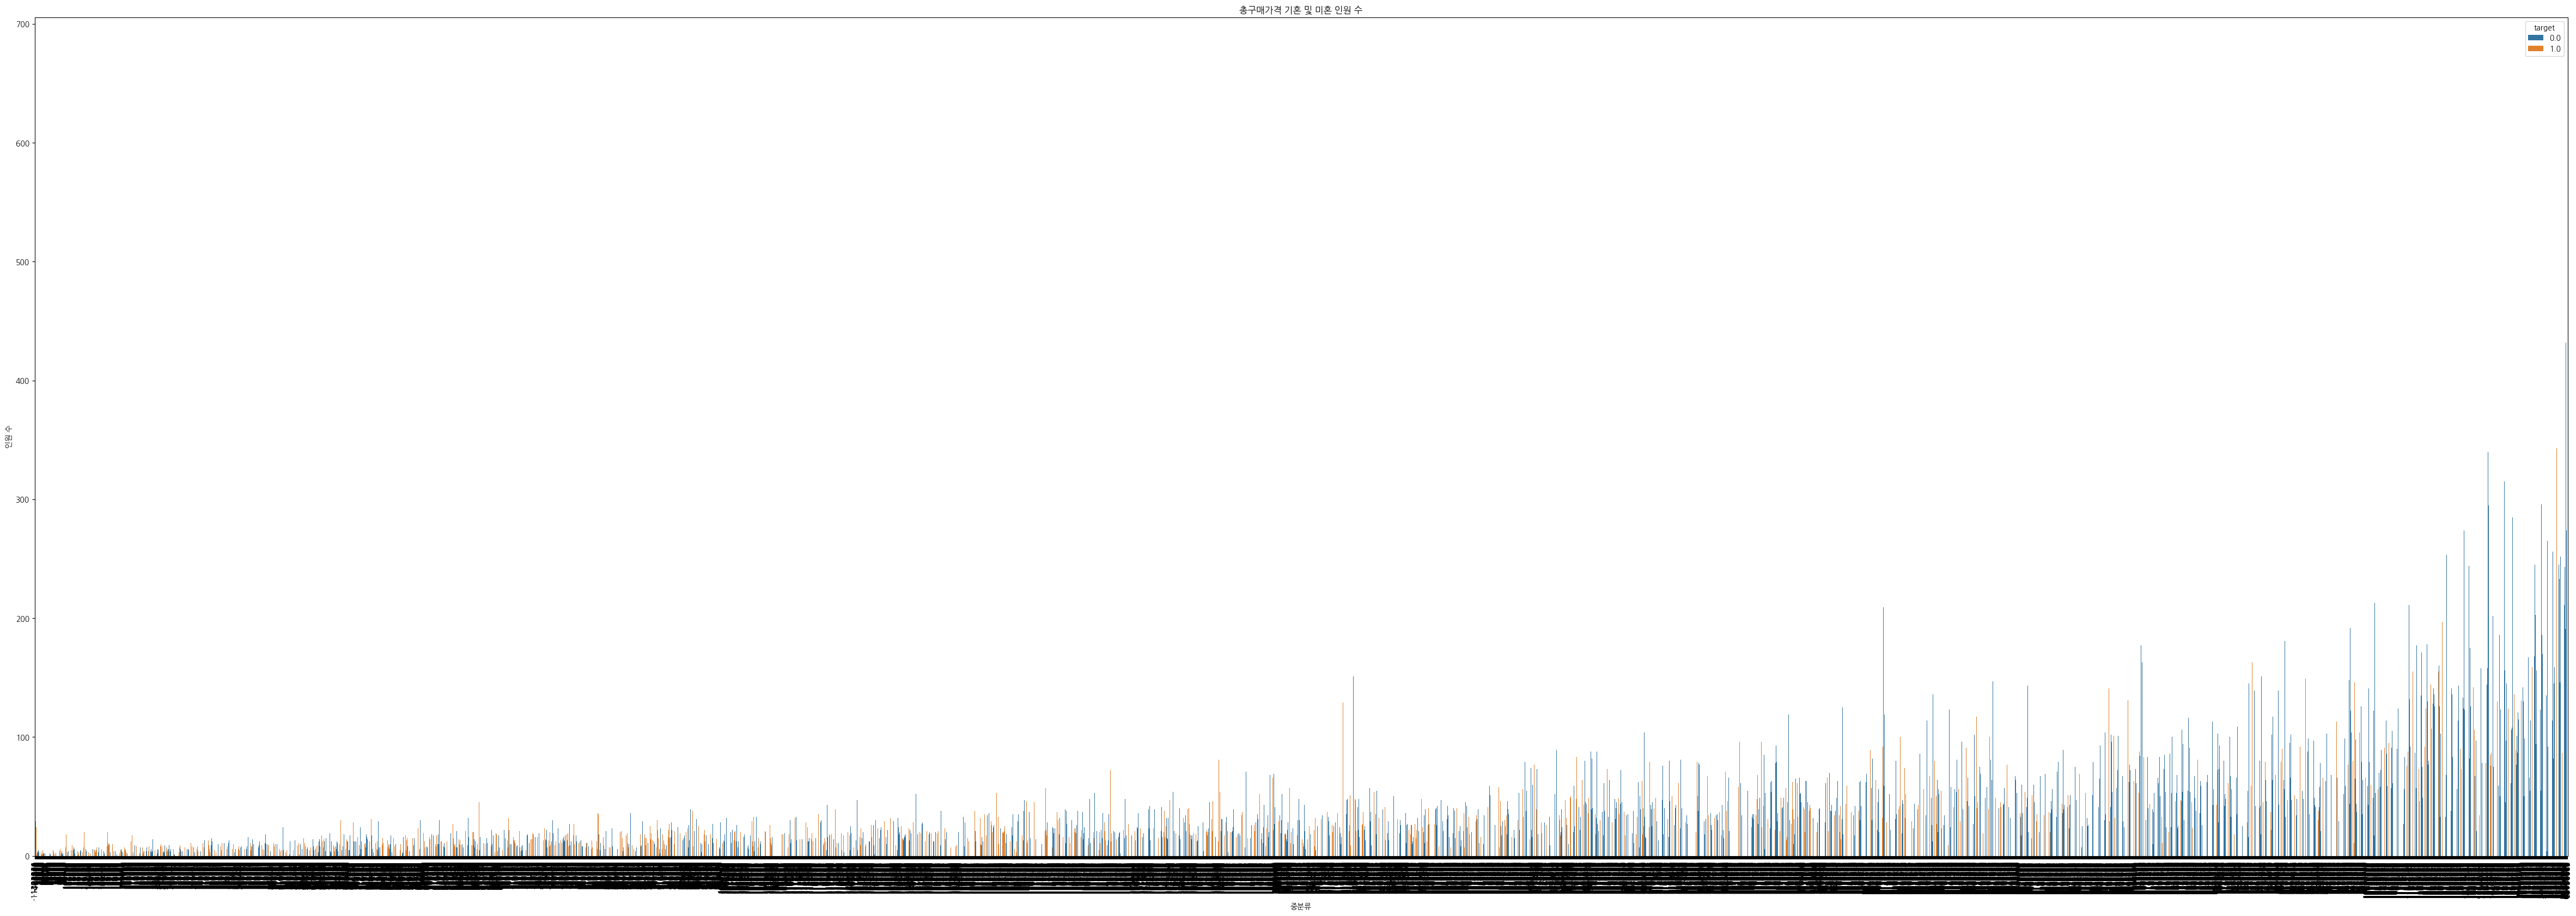

In [11]:
plt.figure(figsize=(60,20))
sns.countplot(data=merged_df, x='총구매가격', hue='target')

plt.title('총구매가격 기혼 및 미혼 인원 수')
plt.xticks(rotation=90)
plt.xlabel('중분류')
plt.ylabel('인원 수')
plt.show()

In [35]:
agg_list = [
        ('총구매액',lambda x: x[x > 0].sum() ),
        ('구매건수', lambda x: x[x > 0].count() ),
        ('평균구매액', lambda x: x[x > 0].mean()),
        ('최대구매액', 'max'),
        ('최소구매액',lambda x: x[x > 0].min() ) ,
        ('환불금액',lambda x: x[x < 0].sum() ) ,
        ('환불건수', lambda x: ( x < 0 ).sum() ),
        ('구매금액표준편차',lambda x: x[x>0].std() ),
    ]

tmp = merged_df.groupby(['ID'])["구매가격"].agg(agg_list).reset_index()
merged_df = merged_df.merge(tmp, how='left')
merged_df['구매금액표준편차'].fillna(0,inplace=True)
merged_df['확정구매']=merged_df['구매건수']-merged_df['환불건수']
merged_df.head()

,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격,target,총구매가격,총구매액,구매건수,평균구매액,최대구매액,최소구매액,환불금액,환불건수,구매금액표준편차,확정구매
0,train_13219,2004-05-01 09:40:00,A144000,공산품파트,차류,5100,59700,0.0,8261677,8428677,100,84286.770000,278000,12000,-167000,2,65633.922974,98
1,train_5590,2004-05-01 09:40:00,A144000,잡화파트,화장잡화,5101,17000,0.0,8007823,8116123,80,101451.537500,3169150,10300,-108300,2,352204.506644,78
2,train_7200,2004-05-01 10:20:00,A112000,공산품,용기보증,5100,34937,0.0,2889337,2965337,53,55949.754717,755000,5500,-76000,2,106599.570010,51
3,train_3010,2004-05-01 10:30:00,A373000,아동_스포츠,아동복,5105,19000,0.0,8230625,10019425,110,91085.681818,993700,6400,-1788800,14,141071.833693,96
4,train_10851,2004-05-01 10:30:00,A112000,가정용품,전화기_카세트,5110,215000,0.0,5446540,5544640,42,132015.238095,528000,13000,-98100,1,124614.268753,41


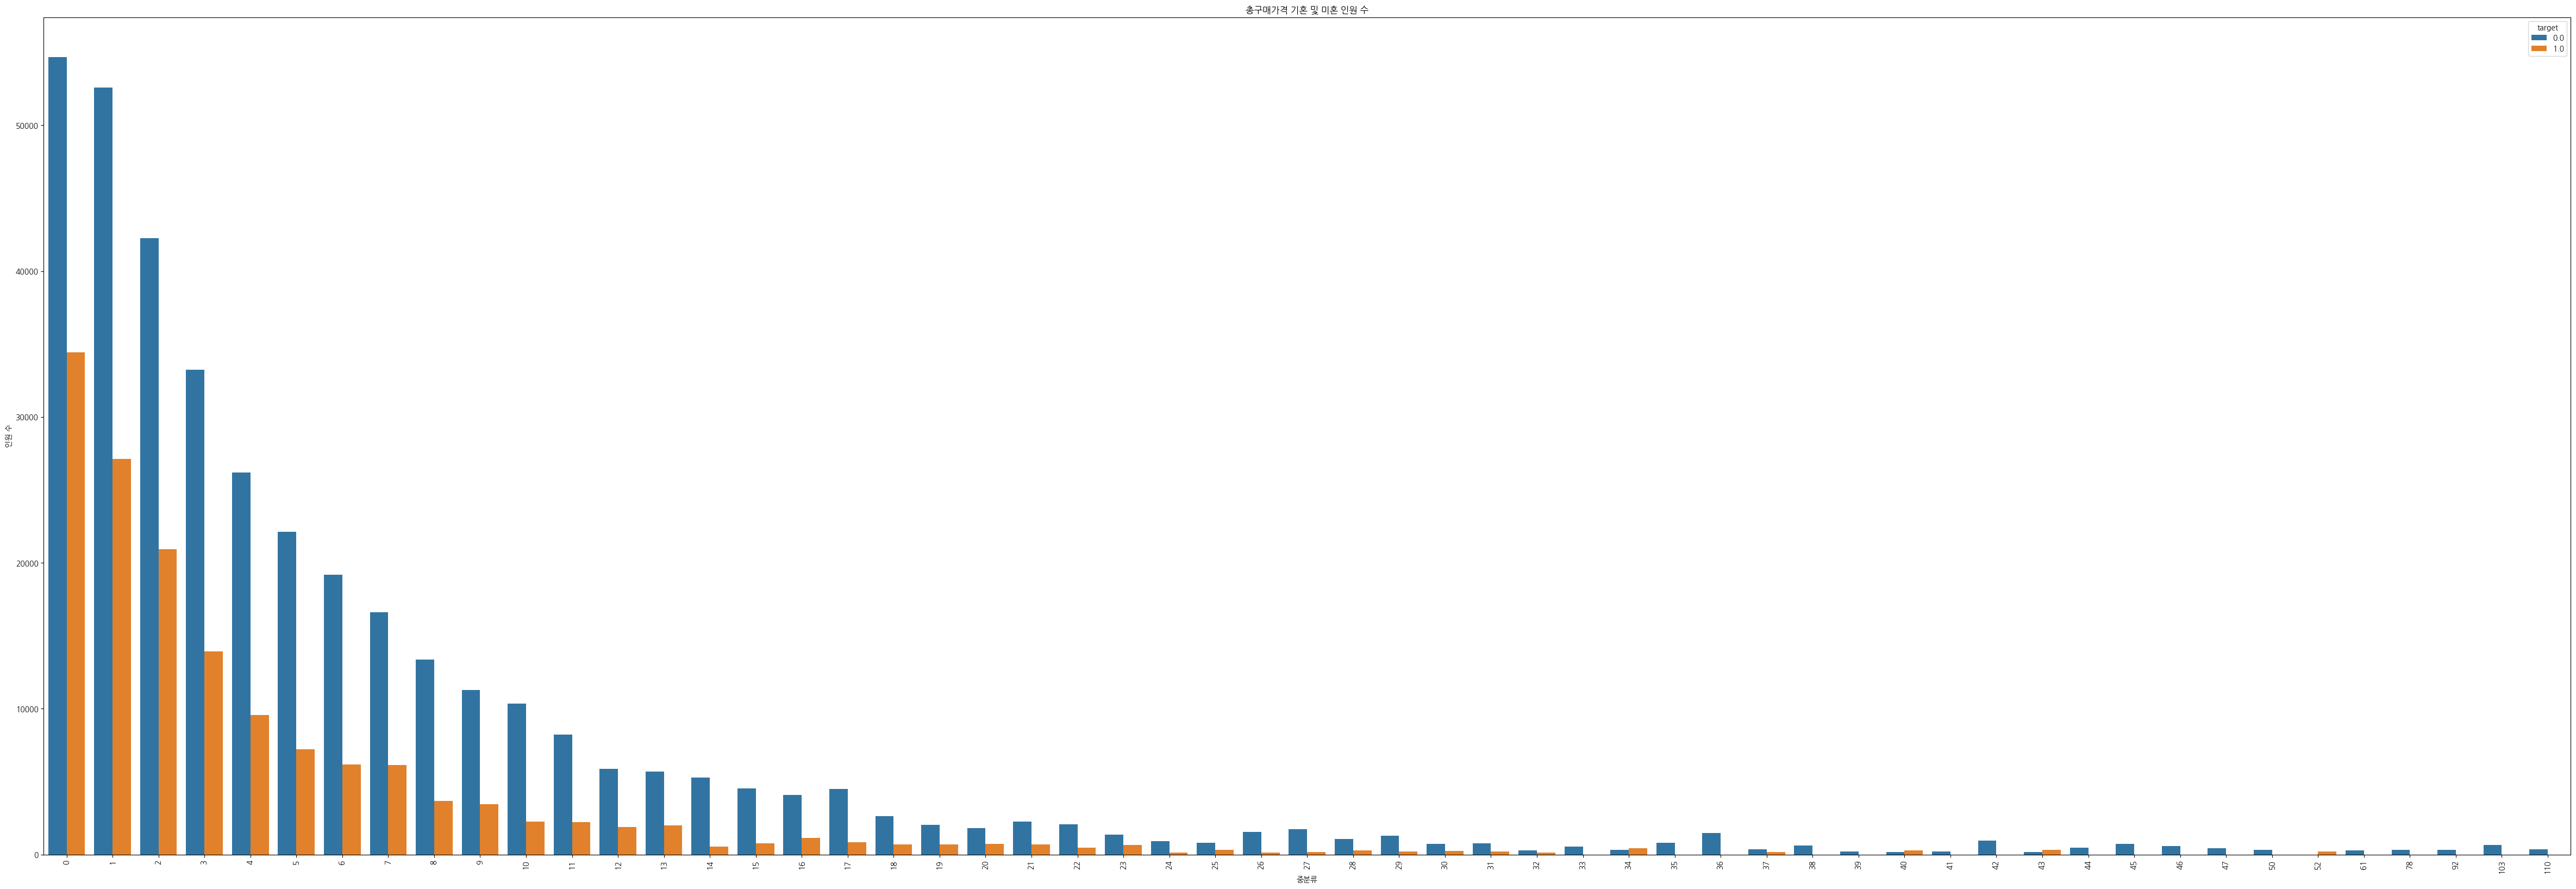

In [7]:
plt.figure(figsize=(60,20))
sns.countplot(data=merged_df, x='환불건수', hue='target')

plt.title('총구매가격 기혼 및 미혼 인원 수')
plt.xticks(rotation=90)
plt.xlabel('중분류')
plt.ylabel('인원 수')
plt.show()

In [36]:
agg_list = [
          ("방문지점수","nunique"),
          ('주구매지점', lambda x: x.mode()[0]),
    ]

tmp = merged_df.groupby('ID')["지점코드"].agg(agg_list).reset_index()
merged_df = merged_df.merge(tmp, how='left')
merged_df.head()

,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격,target,총구매가격,총구매액,구매건수,평균구매액,최대구매액,최소구매액,환불금액,환불건수,구매금액표준편차,확정구매,방문지점수,주구매지점
0,train_13219,2004-05-01 09:40:00,A144000,공산품파트,차류,5100,59700,0.0,8261677,8428677,100,84286.770000,278000,12000,-167000,2,65633.922974,98,1,A144000
1,train_5590,2004-05-01 09:40:00,A144000,잡화파트,화장잡화,5101,17000,0.0,8007823,8116123,80,101451.537500,3169150,10300,-108300,2,352204.506644,78,3,A144000
2,train_7200,2004-05-01 10:20:00,A112000,공산품,용기보증,5100,34937,0.0,2889337,2965337,53,55949.754717,755000,5500,-76000,2,106599.570010,51,2,A112000
3,train_3010,2004-05-01 10:30:00,A373000,아동_스포츠,아동복,5105,19000,0.0,8230625,10019425,110,91085.681818,993700,6400,-1788800,14,141071.833693,96,2,A202000
4,train_10851,2004-05-01 10:30:00,A112000,가정용품,전화기_카세트,5110,215000,0.0,5446540,5544640,42,132015.238095,528000,13000,-98100,1,124614.268753,41,1,A112000


In [37]:

merged_df['4회이상_환불여부'] = np.where(merged_df['환불건수'] >= 4, 1, 0)


In [1]:
plt.figure(figsize=(60,20))
sns.countplot(data=merged_df, x='총구매액', hue='target')

plt.title('총구매가격 기혼 및 미혼 인원 수')
plt.xticks(rotation=90)
plt.xlabel('중분류')
plt.ylabel('인원 수')
plt.show()

NameError: name 'plt' is not defined

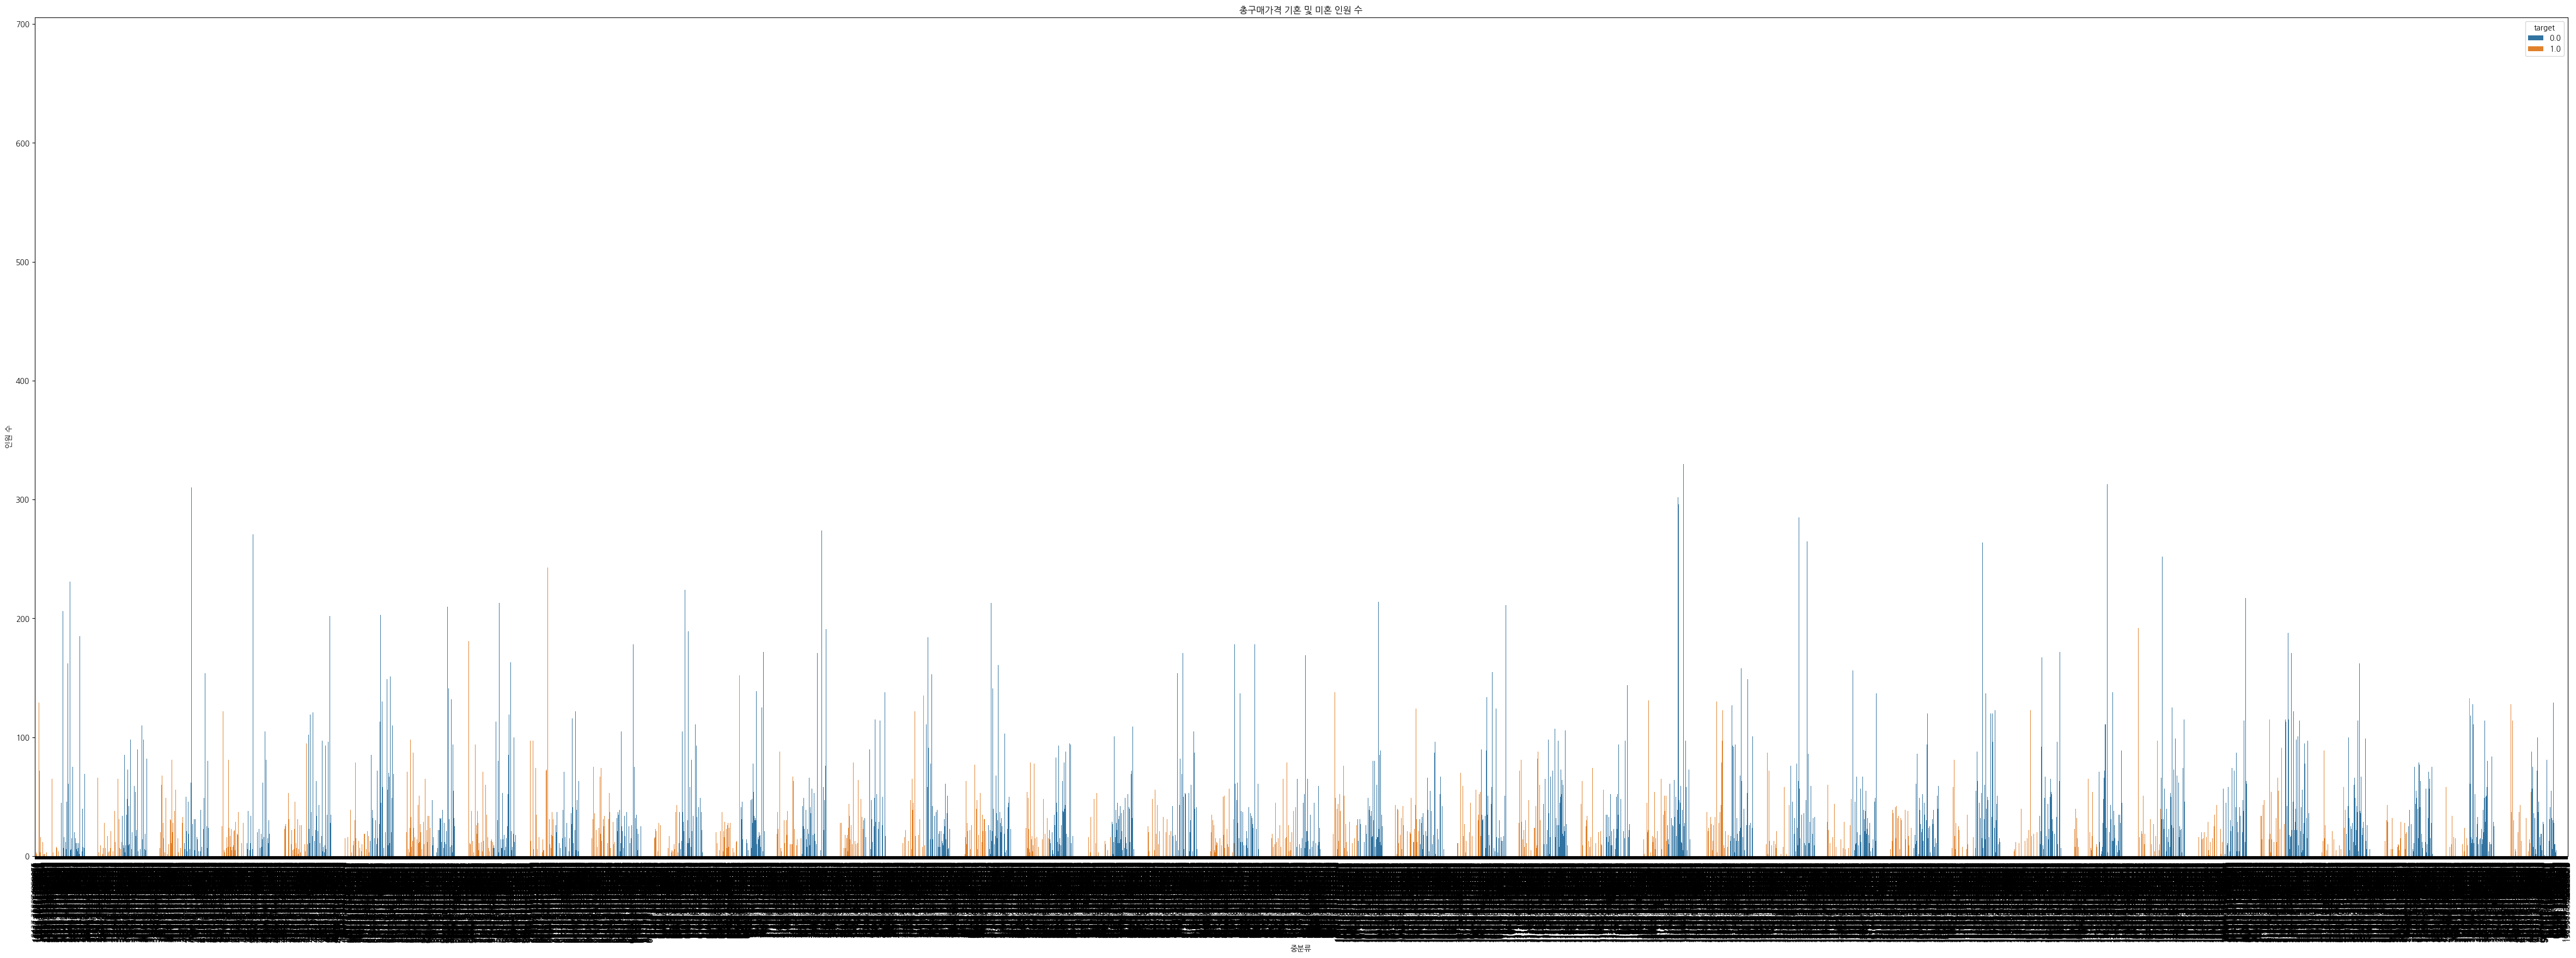

In [10]:
plt.figure(figsize=(60,20))
sns.countplot(data=merged_df, x='평균구매액', hue='target')

plt.title('총구매가격 기혼 및 미혼 인원 수')
plt.xticks(rotation=90)
plt.xlabel('중분류')
plt.ylabel('인원 수')
plt.show()

In [38]:
rank_list = {
    '대분류': lambda x: x.value_counts().nlargest(10).index.tolist(),
    '중분류': lambda x: x.value_counts().nlargest(10).index.tolist()
}

In [39]:
merged_df.groupby('ID')[['대분류','중분류']].agg(rank_list)

,대분류,중분류
ID,,
train_0,"[남성정장스포츠, 패션잡화, 가정용품파트, 가정용품, 잡화파트, 스포츠캐쥬얼, 아동...","[골프웨어, 상품군미지정, 양말, 썬그라스, 싸롱화, 수입종합화장품, 크리스탈, 전..."
train_1,"[영플라자, 패션잡화, 여성캐주얼, 공산품, 영캐릭터, 골프_유니캐쥬얼, 명품잡화,...","[영캐주얼, 토탈, 수입종합화장품, 베이직캐주얼, 엘레강스캐주얼, 과자류, 스포츠캐..."
train_10,"[공산품파트, 생식품파트, 잡화파트, 남성정장스포츠, 공산품, 케주얼_구두_아동, ...","[용기보증, 수입종합화장품, 곡물, 즉석조리, 조미료, 셔츠, 상품군미지정, 야채,..."
train_100,"[골프_유니캐쥬얼, 케주얼_구두_아동, 잡화파트, 영플라자, 가정용품, 스포츠캐쥬얼...","[트래디셔널, 수입종합화장품, 진캐주얼, TV_VCR, 진캐쥬얼, 영트랜드, 용기보..."
train_1000,"[여성정장, 여성캐주얼, 명품잡화, 남성의류, 여성의류파트, 잡화파트, 가정용품파트...","[영캐주얼, 타운웨어, 부띠끄, 수입종합화장품, 상품군미지정, 특정, 디자이너숍, ..."
...,...,...
train_9995,[패션잡화],[국내종합화장품]
train_9996,"[케주얼_구두_아동, 여성의류파트, 잡화파트, 공산품파트, 영플라자, 남성정장스포츠...","[진케주얼, 하이캐쥬얼, 트래디셔널, 상품개발지원, 란제리, 영트랜드, 미시케쥬얼,..."
train_9997,"[영플라자, 아동문화, 패션잡화, 영캐릭터, 여성캐주얼, 공산품]","[영캐주얼, 스포츠캐주얼, 아동, 뉴베이직캐주얼, 스카프, 란제리, 피혁토탈(B2)..."


In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

rank_list = {
    '대분류': lambda x: x.value_counts().nlargest(10).index.tolist(),
    '중분류': lambda x: x.value_counts().nlargest(10).index.tolist()
}

grouped = merged_df.groupby('ID')[['대분류', '중분류']].agg(rank_list)

# Convert the lists of categories into single string per 'ID' for both '대분류' and '중분류'
grouped['대분류'] = grouped['대분류'].apply(lambda x: ' '.join(x))
grouped['중분류'] = grouped['중분류'].apply(lambda x: ' '.join(x))

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Concatenate '대분류' and '중분류' texts for vectorization
texts = grouped['대분류'].tolist() + grouped['중분류'].tolist()
tfidf_matrix = vectorizer.fit_transform(texts)

# Calculate similarity scores. Since the '대분류' and '중분류' are concatenated,
# the similarity is calculated between each '대분류' and its corresponding '중분류'
similarity_scores = cosine_similarity(tfidf_matrix[:len(grouped)], tfidf_matrix[len(grouped):])

# Add the similarity scores to the DataFrame
grouped['중분류_대분류_유사도'] = similarity_scores.diagonal()

merged_df['중분류_대분류_유사도']=grouped['중분류_대분류_유사도'] 


In [40]:
agg_worktime_visit = [
    ('근무시간_방문비율' , lambda x : np.mean((x.dt.hour >= 9) & (x.dt.hour <= 17)))
]

tmp = merged_df.groupby('ID')['구매일시'].agg(agg_worktime_visit).reset_index()

merged_df = merged_df.merge(tmp, how='left')

In [41]:
sum(merged_df.loc[:,['근무시간_방문비율','target']]['target']==0)

371574

In [42]:
sum(merged_df.loc[:,['근무시간_방문비율','target']]['target']==1)

151531

In [43]:
agg_list = [
        # 컬럼명, 집계 방식 튜플
        ('내점일수',lambda x : x.dt.date.nunique() ),
        ('구매주기',lambda x : ( x.max() - x.min() ).days / x.dt.date.nunique() ),
        ('주말방문비율', lambda x: np.mean(x.dt.dayofweek>4)),
        ('봄_구매비율', lambda x: np.mean(x.dt.month.isin([3,4,5]))),
        ('여름_구매비율', lambda x: np.mean(x.dt.month.isin([6,7,8]))),
        ('가을_구매비율', lambda x: np.mean(x.dt.month.isin([9,10,11]))),
        ('겨울_구매비율', lambda x: np.mean(x.dt.month.isin([1,2,12]))),
        ('주구매요일', lambda x: x.dt.dayofweek.value_counts().index[0]),
        ('주구매개월', lambda x: x.dt.month.value_counts().index[0]),
        ('거래개월수', lambda x: x.dt.month.nunique() ),
    ]

tmp = merged_df.groupby('ID')["구매일시"].agg(agg_list).reset_index()
merged_df = merged_df.merge(tmp, how='left')
merged_df['봄_가을_구매합']=merged_df['봄_구매비율']+merged_df['가을_구매비율']
merged_df['봄_가을_방문여부'] = np.where((merged_df['봄_구매비율'] > 0) & (merged_df['가을_구매비율'] > 0), 1, 0)
# weekday_dummies = pd.get_dummies(merged_df['주구매요일'], prefix='주구매요일')
# month_dummies = pd.get_dummies(merged_df['주구매개월'], prefix='주구매개월')

# 원-핫 인코딩된 데이터프레임 병합
# merged_df = pd.concat([merged_df, weekday_dummies, month_dummies], axis=1)
merged_df.head()

,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격,target,총구매가격,총구매액,...,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,주구매개월,거래개월수,봄_가을_구매합,봄_가을_방문여부
0,train_13219,2004-05-01 09:40:00,A144000,공산품파트,차류,5100,59700,0.0,8261677,8428677,...,0.186275,0.196078,0.235294,0.205882,0.362745,4,2,12,0.401961,1
1,train_5590,2004-05-01 09:40:00,A144000,잡화파트,화장잡화,5101,17000,0.0,8007823,8116123,...,0.073171,0.268293,0.341463,0.243902,0.146341,4,7,12,0.512195,1
2,train_7200,2004-05-01 10:20:00,A112000,공산품,용기보증,5100,34937,0.0,2889337,2965337,...,0.200000,0.509091,0.236364,0.109091,0.145455,0,5,8,0.618182,1
3,train_3010,2004-05-01 10:30:00,A373000,아동_스포츠,아동복,5105,19000,0.0,8230625,10019425,...,0.258065,0.129032,0.282258,0.298387,0.290323,2,7,12,0.427419,1
4,train_10851,2004-05-01 10:30:00,A112000,가정용품,전화기_카세트,5110,215000,0.0,5446540,5544640,...,0.348837,0.093023,0.581395,0.162791,0.162791,2,6,9,0.255814,1


In [19]:
merged_df.drop('중분류_대분류_유사도',axis=1,inplace=True)

In [44]:
def search_season(data):
    tmp=data.groupby('ID')[['봄_구매비율','여름_구매비율','가을_구매비율','겨울_구매비율']].max().idxmax(axis=1).apply(lambda x: x.split('_')[0])
    tmp=tmp.reset_index().rename(columns={0:'주구매계절'})
#     count_dict = tmp["주구매계절"].value_counts().to_dict()
#     tmp["주구매계절"]=tmp["주구매계절"].map(count_dict)
    return tmp

merged_df=merged_df.merge(search_season(merged_df), how='left')

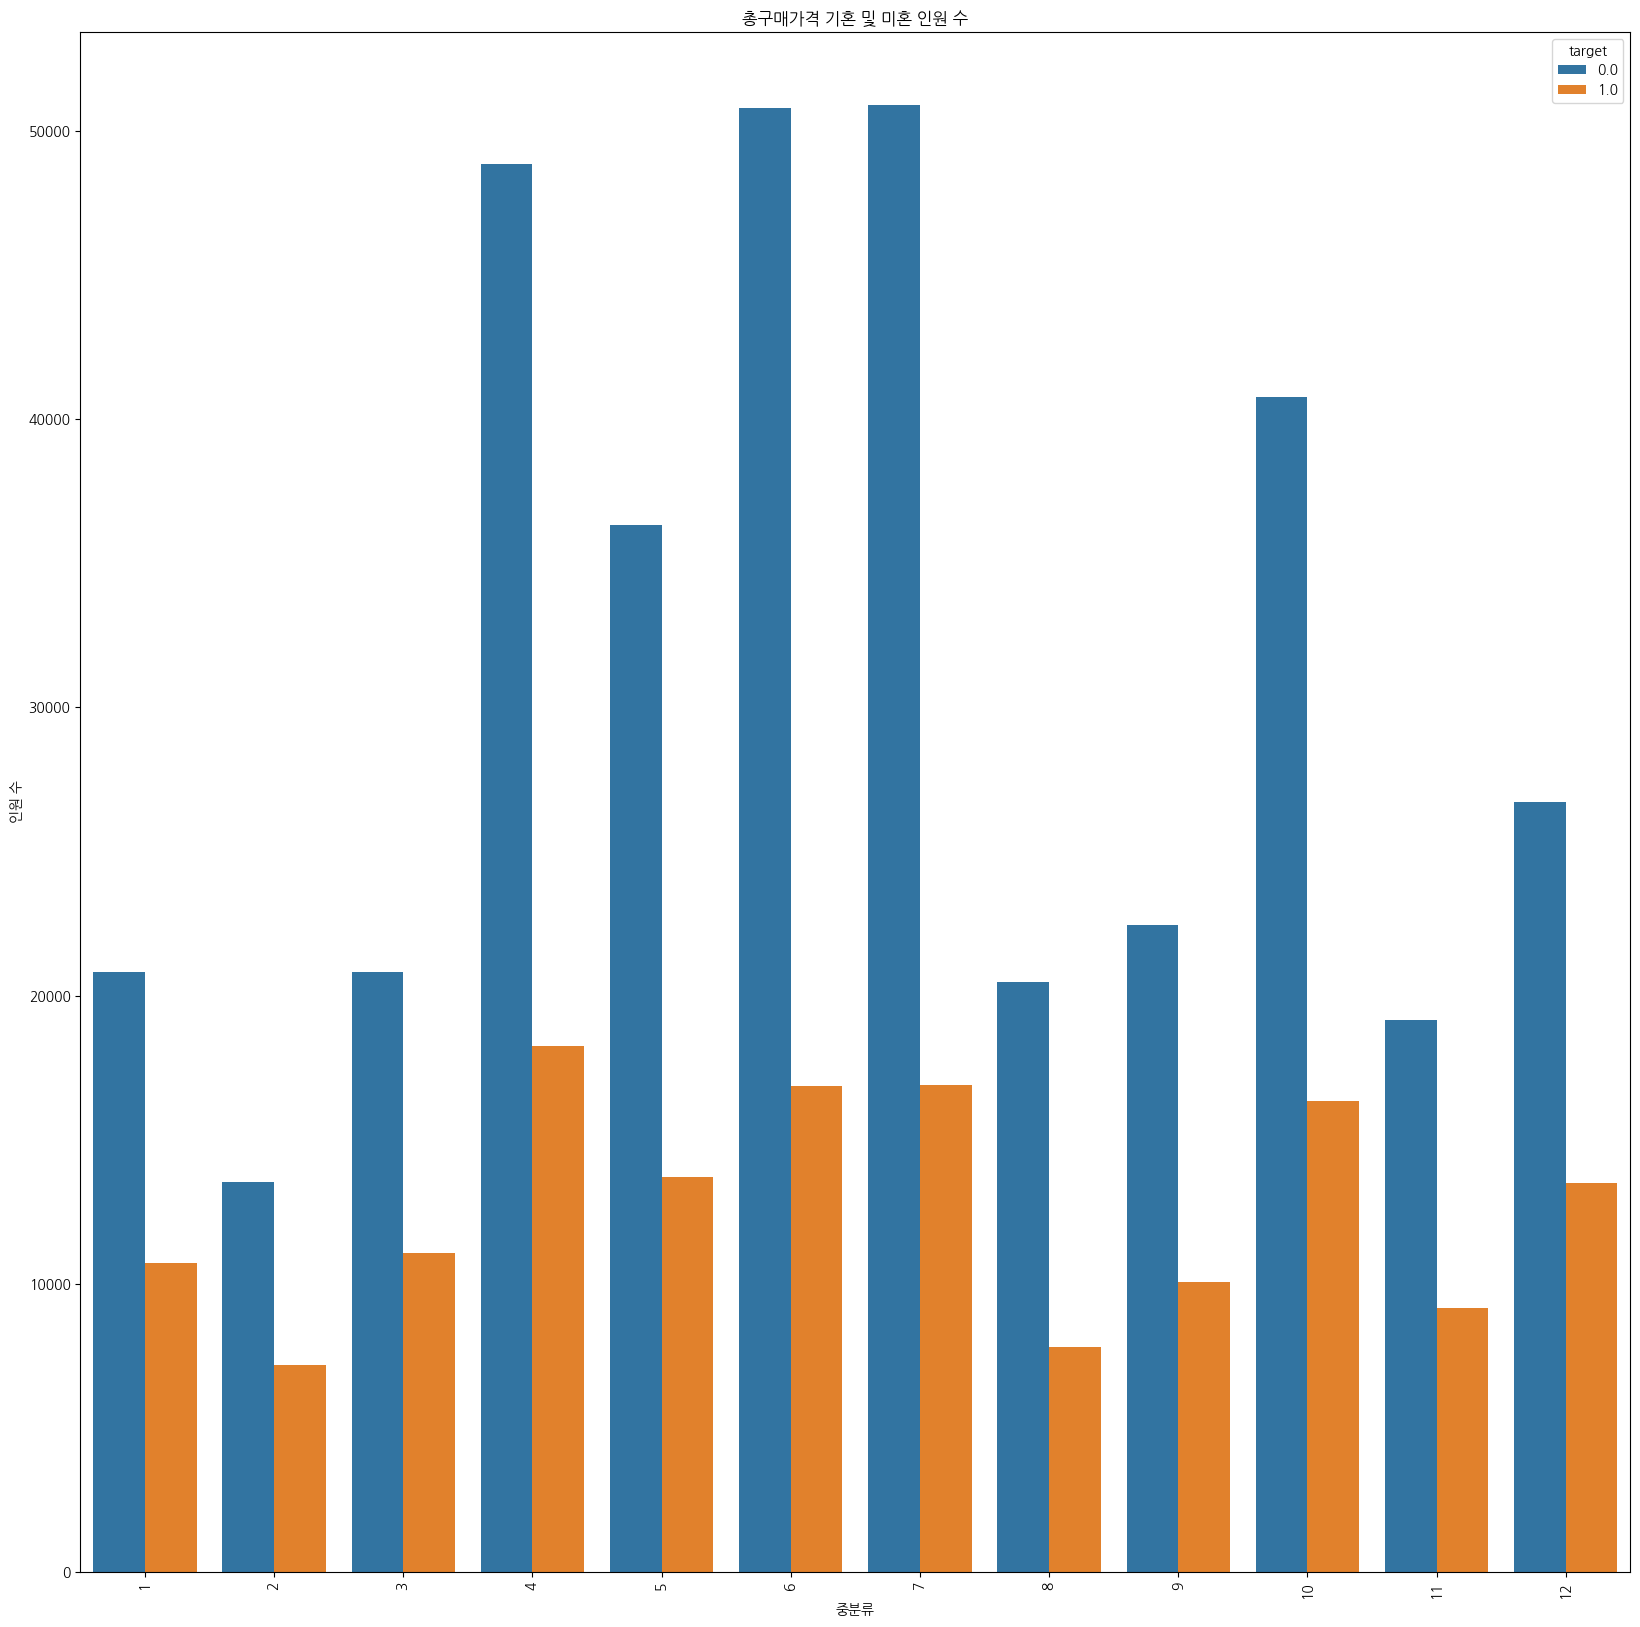

In [126]:
plt.figure(figsize=(20,20))
sns.countplot(data=merged_df, x='주구매개월', hue='target')

plt.title('총구매가격 기혼 및 미혼 인원 수')
plt.xticks(rotation=90)
plt.xlabel('중분류')
plt.ylabel('인원 수')
plt.show()

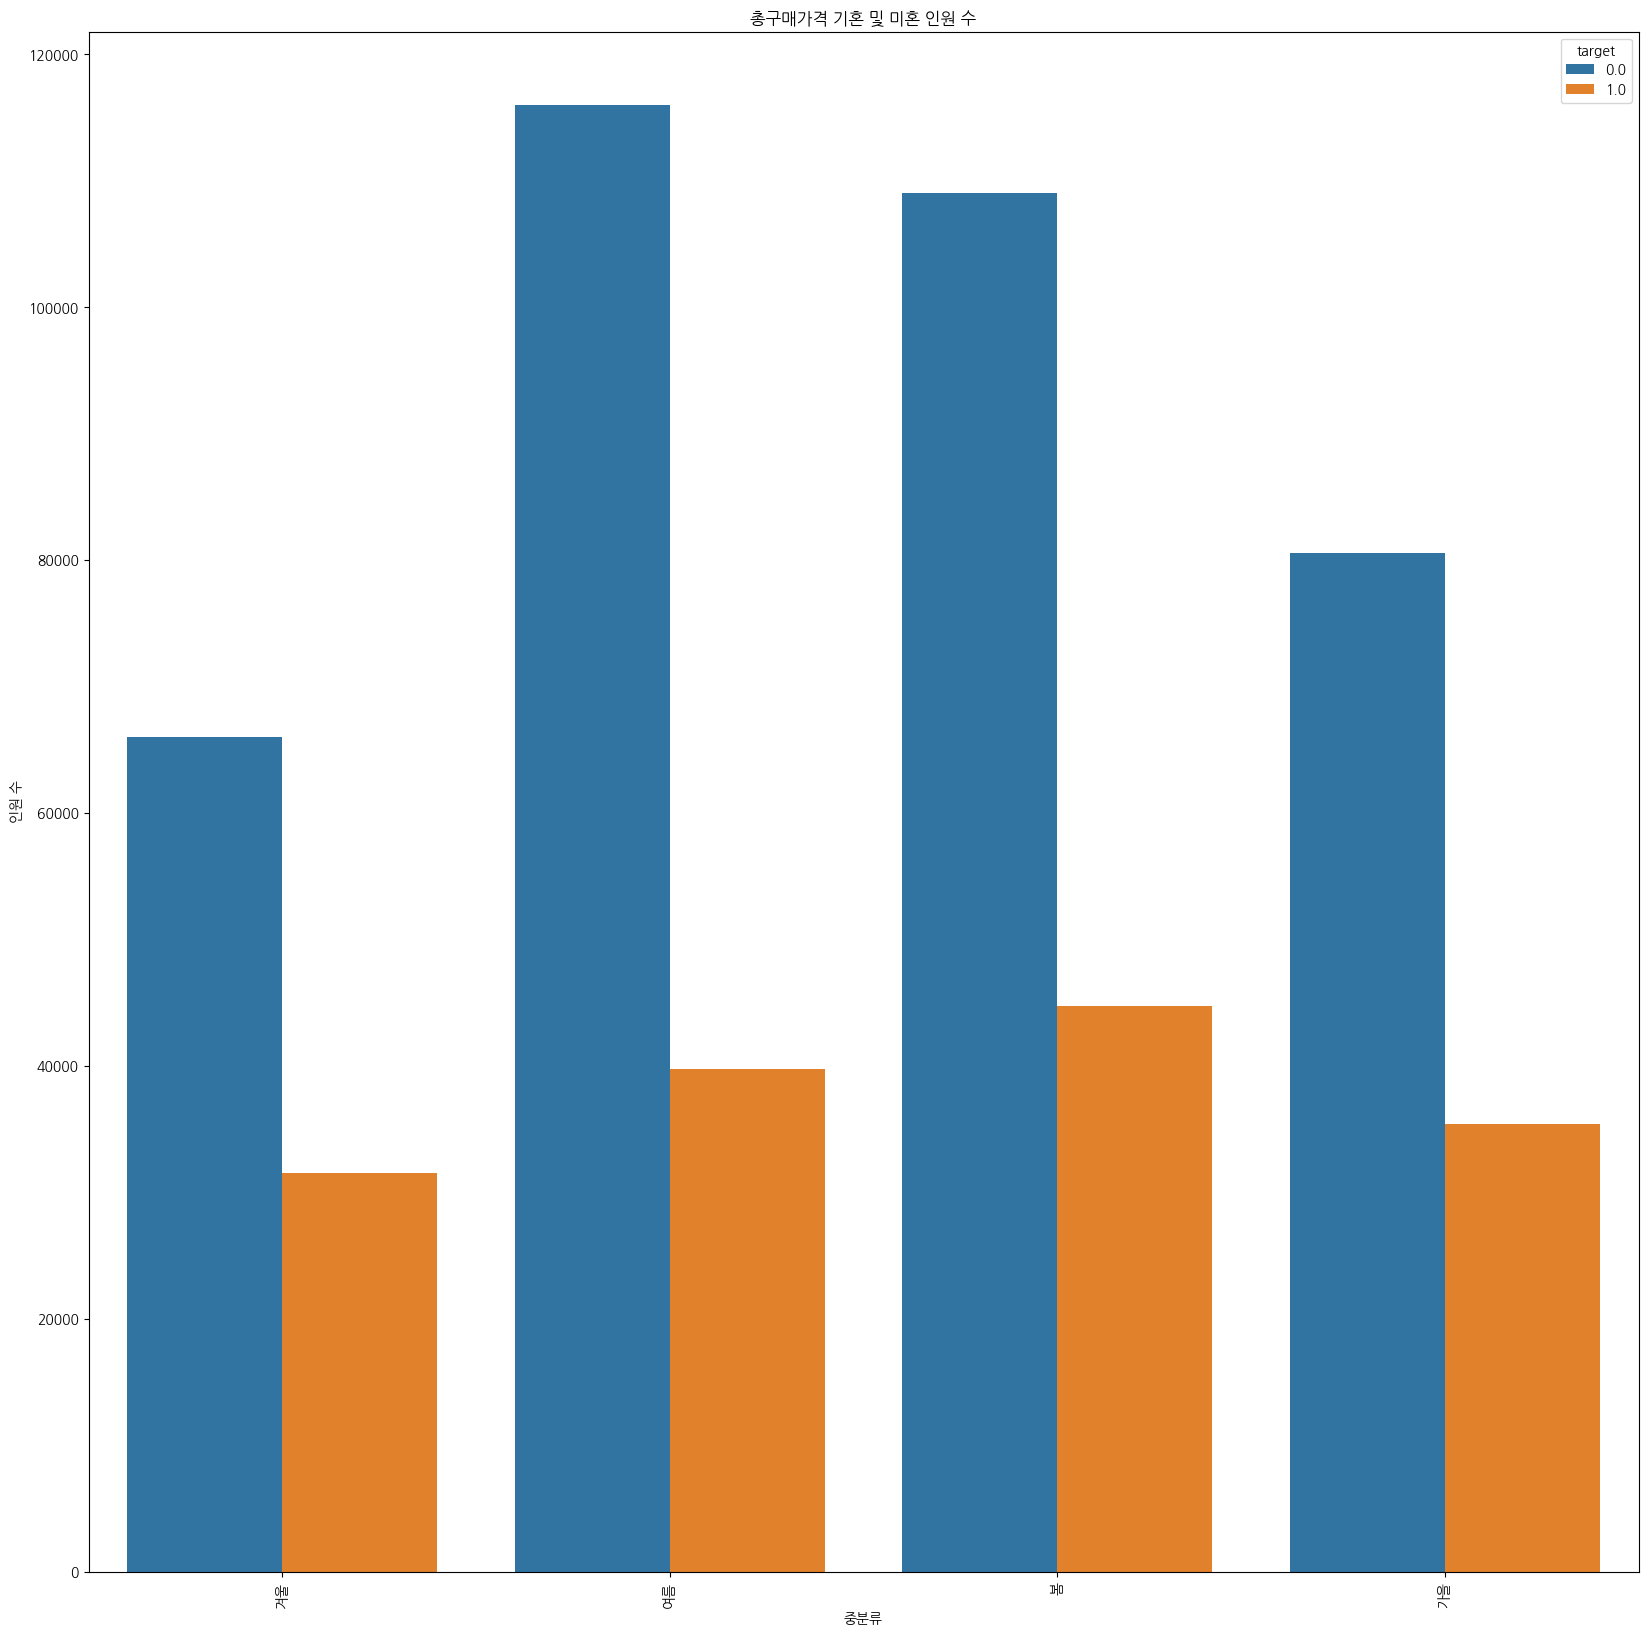

In [132]:
plt.figure(figsize=(20,20))
sns.countplot(data=merged_df, x='주구매계절', hue='target')

plt.title('주구매개절 기혼 및 미혼 인원 수')
plt.xticks(rotation=90)
plt.xlabel('중분류')
plt.ylabel('인원 수')
plt.show()

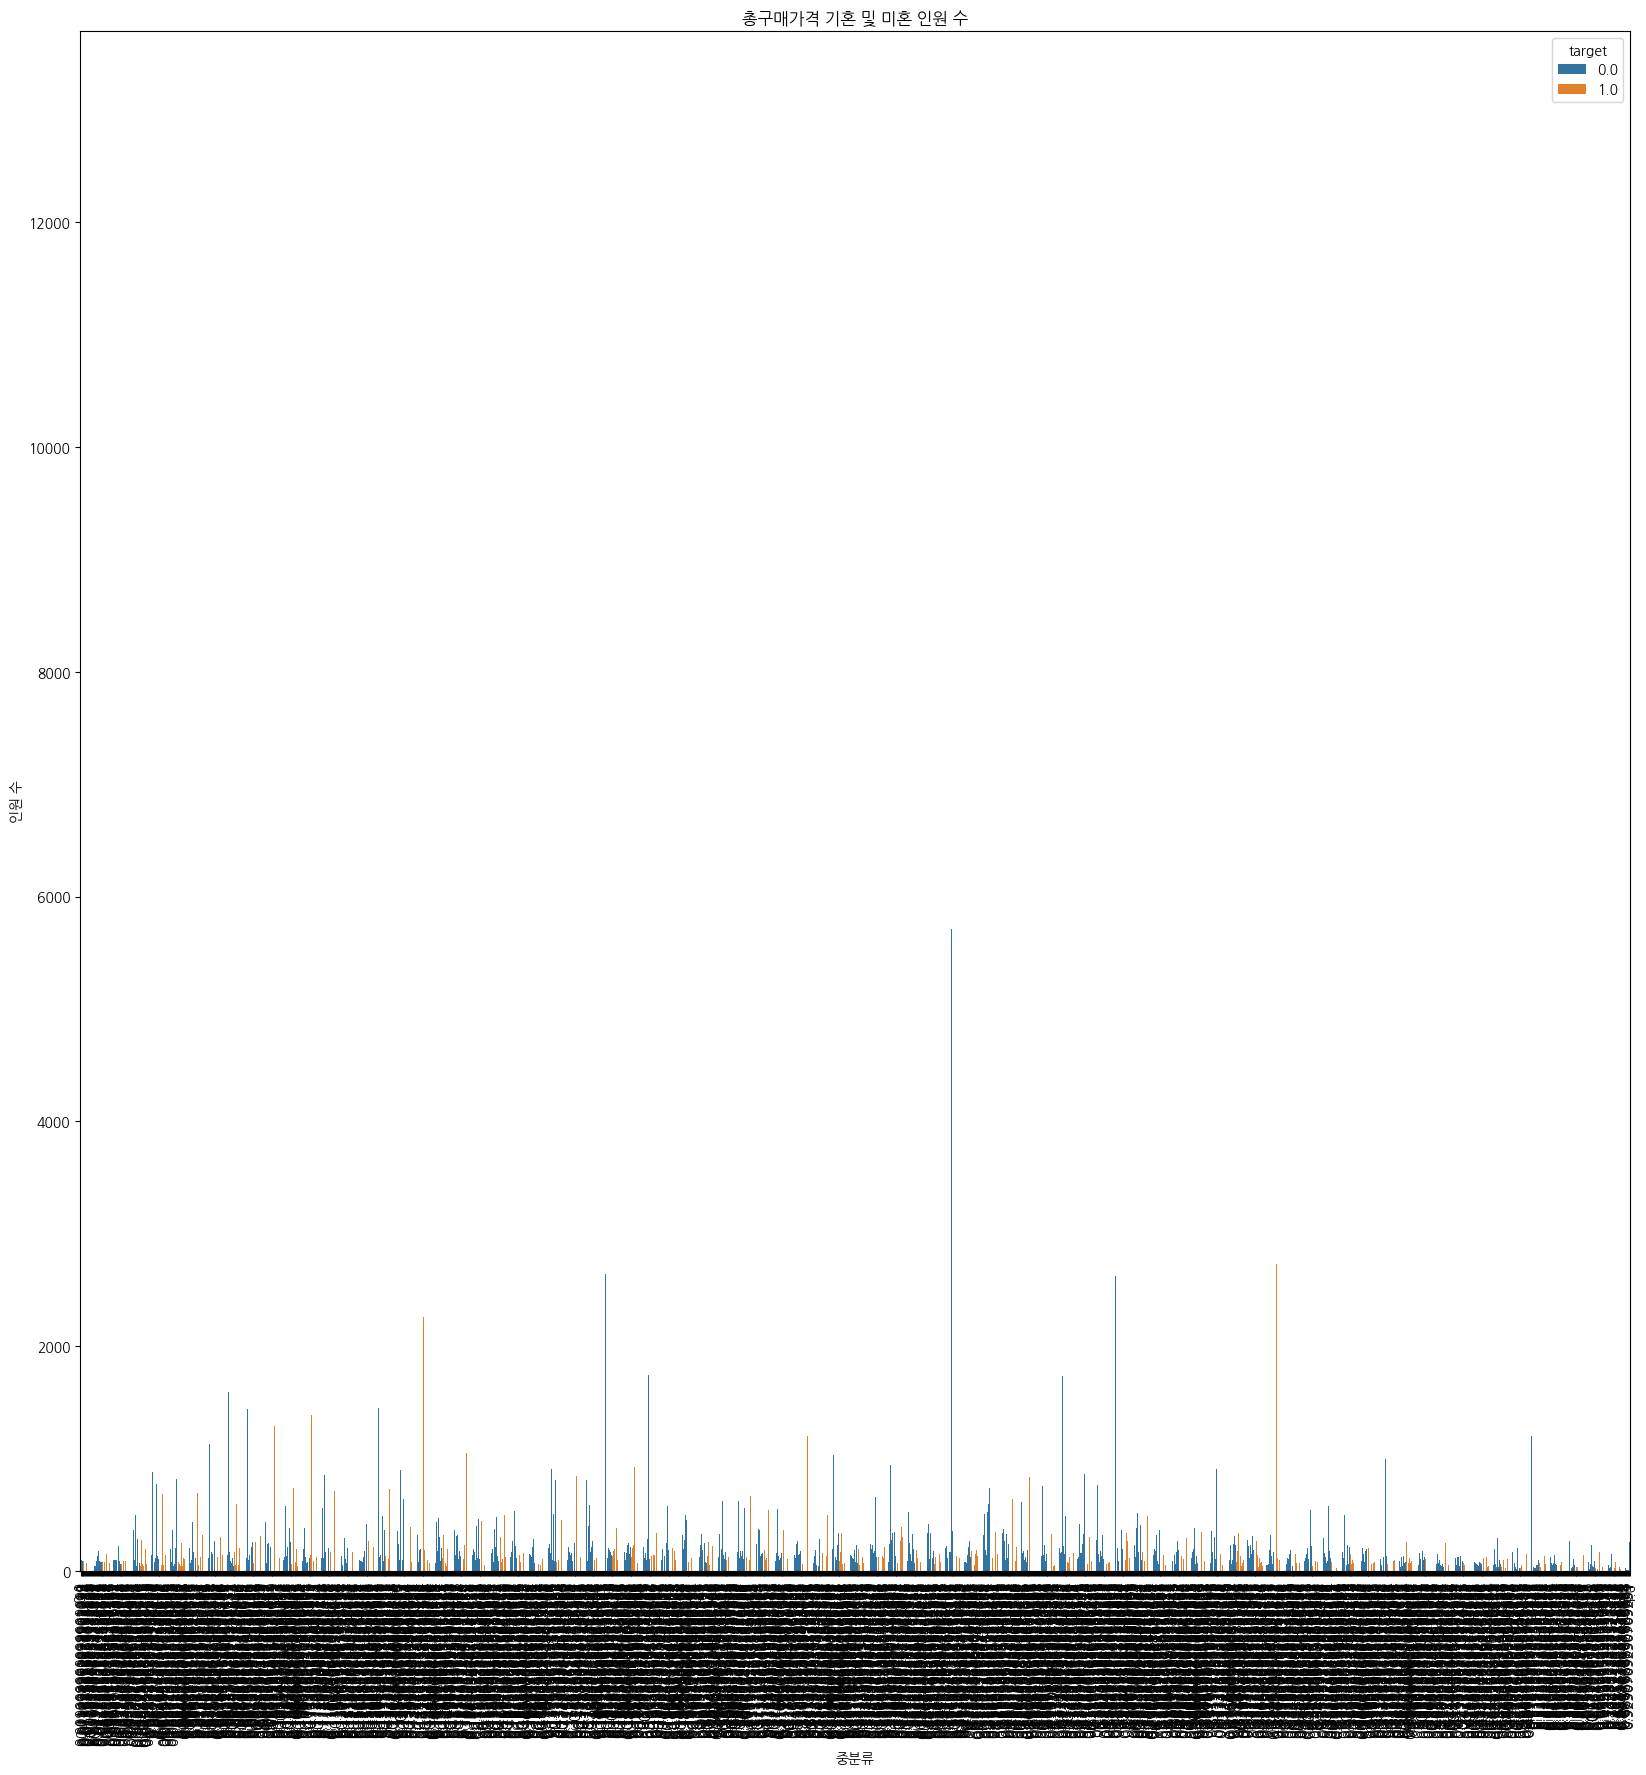

In [133]:
plt.figure(figsize=(20,20))
sns.countplot(data=merged_df, x='주말방문비율', hue='target')

plt.title('총구매가격 기혼 및 미혼 인원 수')
plt.xticks(rotation=90)
plt.xlabel('중분류')
plt.ylabel('인원 수')
plt.show()

In [45]:
merged_df['총구매가격']=merged_df['ID'].map(merged_df.groupby('ID')['구매가격']\
                                      .agg(lambda x :sum(x)).fillna(0))

In [46]:
merged_df['총구매가격']

0         8261677
1         8007823
2         2889337
3         8230625
4         5446540
           ...   
523100    1564000
523101    8736100
523102     681010
523103    1163347
523104    1564000
Name: 총구매가격, Length: 523105, dtype: int64

In [47]:
merged_df['총구매가격_구간'] = pd.qcut(merged_df['총구매가격']\
                              , 4, labels=["Q1", "Q2", "Q3", "Q4"]\
                              , duplicates='drop')


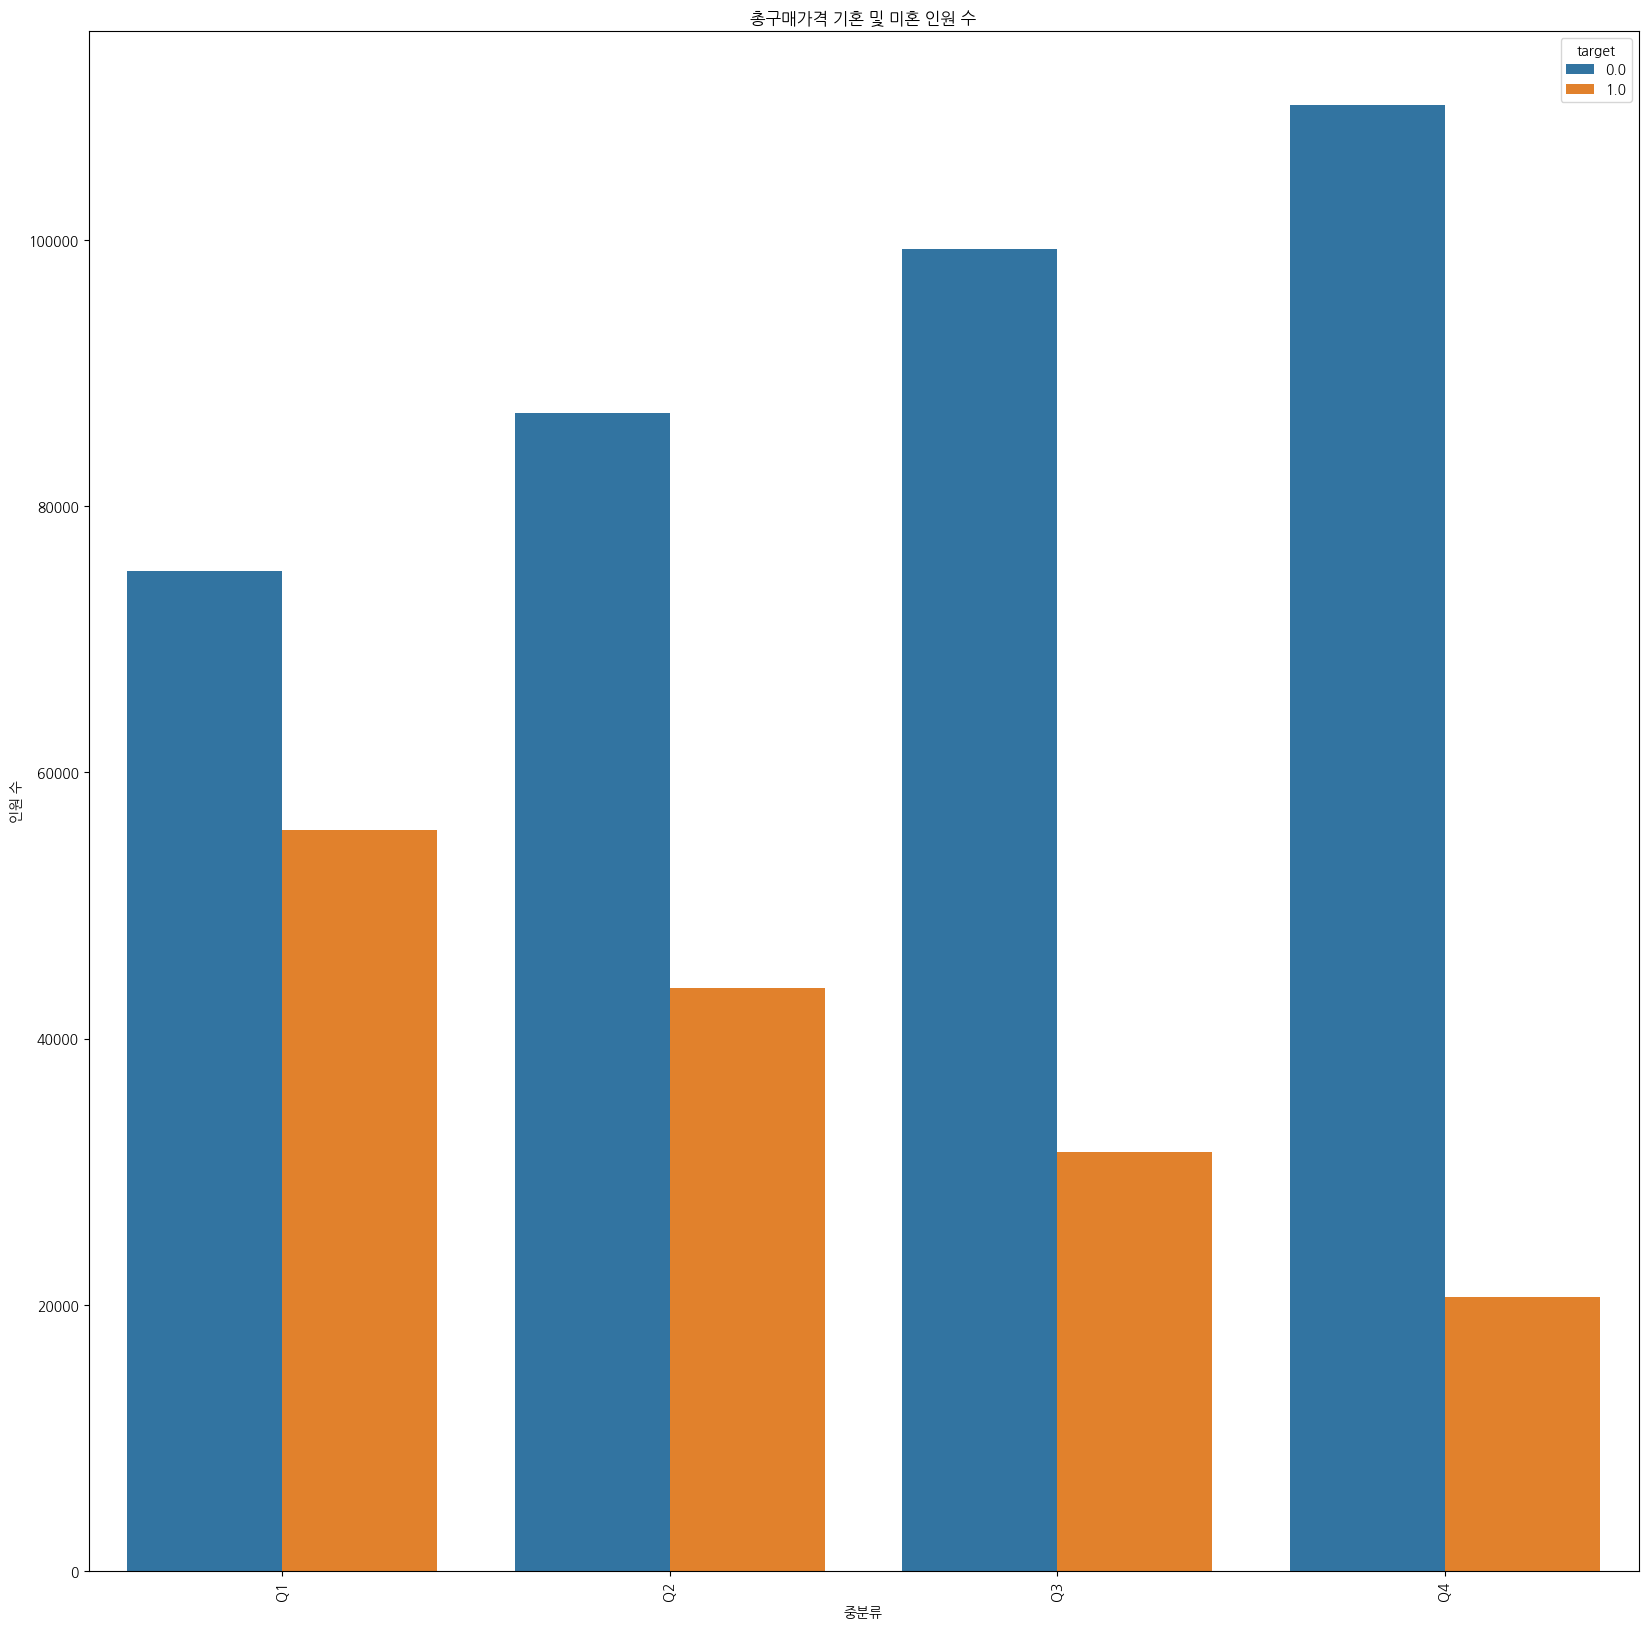

In [137]:
plt.figure(figsize=(20,20))
sns.countplot(data=merged_df, x='총구매가격_구간', hue='target')

plt.title('총구매가격 기혼 및 미혼 인원 수')
plt.xticks(rotation=90)
plt.xlabel('중분류')
plt.ylabel('인원 수')
plt.show()

In [50]:
back_up=merged_df.copy()
back_up.head()

,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격,target,총구매가격,총구매액,...,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,주구매개월,거래개월수,봄_가을_구매합,봄_가을_방문여부,주구매계절,총구매가격_구간
0,train_13219,2004-05-01 09:40:00,A144000,공산품파트,차류,5100,59700,0.0,8261677,8428677,...,0.235294,0.205882,0.362745,4,2,12,0.401961,1,겨울,Q3
1,train_5590,2004-05-01 09:40:00,A144000,잡화파트,화장잡화,5101,17000,0.0,8007823,8116123,...,0.341463,0.243902,0.146341,4,7,12,0.512195,1,여름,Q3
2,train_7200,2004-05-01 10:20:00,A112000,공산품,용기보증,5100,34937,0.0,2889337,2965337,...,0.236364,0.109091,0.145455,0,5,8,0.618182,1,봄,Q2
3,train_3010,2004-05-01 10:30:00,A373000,아동_스포츠,아동복,5105,19000,0.0,8230625,10019425,...,0.282258,0.298387,0.290323,2,7,12,0.427419,1,가을,Q3
4,train_10851,2004-05-01 10:30:00,A112000,가정용품,전화기_카세트,5110,215000,0.0,5446540,5544640,...,0.581395,0.162791,0.162791,2,6,9,0.255814,1,여름,Q3


In [51]:
merged_df=back_up.copy()
merged_df.head()

,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격,target,총구매가격,총구매액,...,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,주구매개월,거래개월수,봄_가을_구매합,봄_가을_방문여부,주구매계절,총구매가격_구간
0,train_13219,2004-05-01 09:40:00,A144000,공산품파트,차류,5100,59700,0.0,8261677,8428677,...,0.235294,0.205882,0.362745,4,2,12,0.401961,1,겨울,Q3
1,train_5590,2004-05-01 09:40:00,A144000,잡화파트,화장잡화,5101,17000,0.0,8007823,8116123,...,0.341463,0.243902,0.146341,4,7,12,0.512195,1,여름,Q3
2,train_7200,2004-05-01 10:20:00,A112000,공산품,용기보증,5100,34937,0.0,2889337,2965337,...,0.236364,0.109091,0.145455,0,5,8,0.618182,1,봄,Q2
3,train_3010,2004-05-01 10:30:00,A373000,아동_스포츠,아동복,5105,19000,0.0,8230625,10019425,...,0.282258,0.298387,0.290323,2,7,12,0.427419,1,가을,Q3
4,train_10851,2004-05-01 10:30:00,A112000,가정용품,전화기_카세트,5110,215000,0.0,5446540,5544640,...,0.581395,0.162791,0.162791,2,6,9,0.255814,1,여름,Q3


In [52]:
merged_df['봄_총구매금액'] = merged_df['총구매액'] * merged_df['봄_구매비율']
merged_df['여름_총구매금액'] = merged_df['총구매액'] * merged_df['여름_구매비율']
merged_df['가을_총구매금액'] = merged_df['총구매액'] * merged_df['가을_구매비율']
merged_df['겨울_총구매금액'] = merged_df['총구매액'] * merged_df['겨울_구매비율']
merged_df

,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격,target,총구매가격,총구매액,...,주구매개월,거래개월수,봄_가을_구매합,봄_가을_방문여부,주구매계절,총구매가격_구간,봄_총구매금액,여름_총구매금액,가을_총구매금액,겨울_총구매금액
0,train_13219,2004-05-01 09:40:00,A144000,공산품파트,차류,5100,59700,0.0,8261677,8428677,...,2,12,0.401961,1,겨울,Q3,1.652682e+06,1.983218e+06,1.735316e+06,3.057461e+06
1,train_5590,2004-05-01 09:40:00,A144000,잡화파트,화장잡화,5101,17000,0.0,8007823,8116123,...,7,12,0.512195,1,여름,Q3,2.177496e+06,2.771359e+06,1.979542e+06,1.187725e+06
2,train_7200,2004-05-01 10:20:00,A112000,공산품,용기보증,5100,34937,0.0,2889337,2965337,...,5,8,0.618182,1,봄,Q2,1.509626e+06,7.008978e+05,3.234913e+05,4.313217e+05
3,train_3010,2004-05-01 10:30:00,A373000,아동_스포츠,아동복,5105,19000,0.0,8230625,10019425,...,7,12,0.427419,1,가을,Q3,1.292829e+06,2.828064e+06,2.989667e+06,2.908865e+06
4,train_10851,2004-05-01 10:30:00,A112000,가정용품,전화기_카세트,5110,215000,0.0,5446540,5544640,...,6,9,0.255814,1,여름,Q3,5.157805e+05,3.223628e+06,9.026158e+05,9.026158e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523100,train_330,2005-04-29 19:53:00,A112000,영캐릭터,트렌드캐주얼,5882,484000,1.0,1564000,1564000,...,4,3,0.833333,0,봄,Q1,1.303333e+06,0.000000e+00,0.000000e+00,2.606667e+05
523101,train_9738,2005-04-29 19:54:00,A373000,아동_스포츠,상품군미지정,5191,144000,0.0,8736100,8823100,...,7,7,0.368421,1,여름,Q3,1.160934e+06,3.714989e+06,2.089682e+06,1.857495e+06
523102,train_10787,2005-04-29 20:00:00,A112000,공산품,음료,5100,8340,1.0,681010,681010,...,4,2,1.000000,0,봄,Q1,6.810100e+05,0.000000e+00,0.000000e+00,0.000000e+00
523103,train_13129,2005-04-29 20:00:00,A112000,생식품,용기보증,5100,23170,0.0,1163347,1163347,...,4,9,0.644444,1,봄,Q1,5.687474e+05,2.585216e+04,1.809651e+05,3.877823e+05


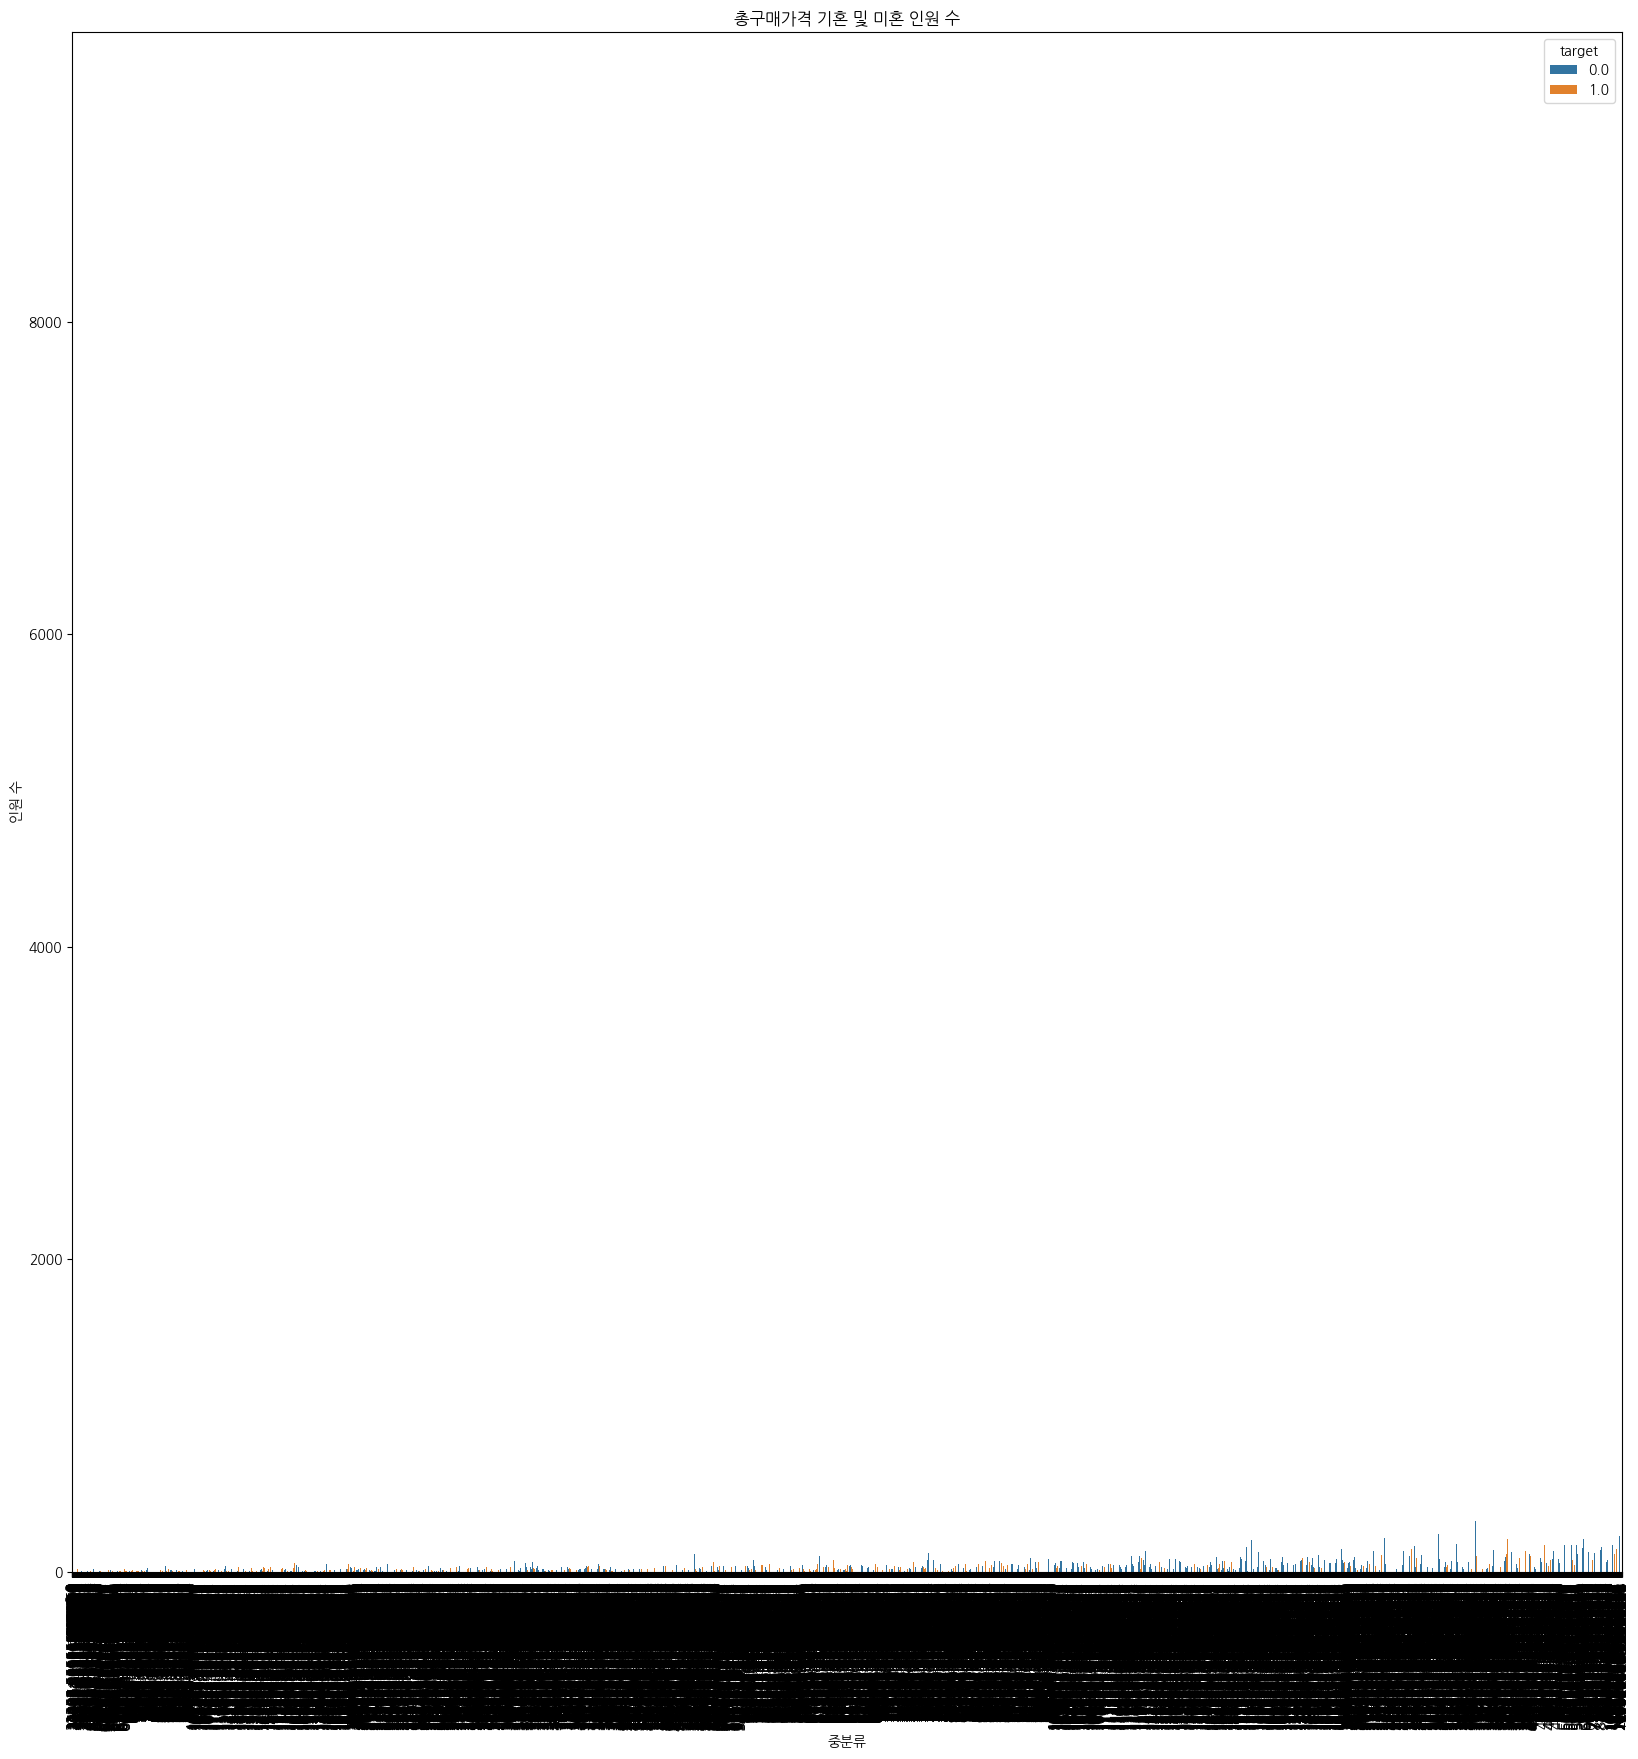

In [53]:
plt.figure(figsize=(20,20))
sns.countplot(data=merged_df, x='봄_총구매금액', hue='target')

plt.title('총구매가격 기혼 및 미혼 인원 수')
plt.xticks(rotation=90)
plt.xlabel('중분류')
plt.ylabel('인원 수')
plt.show()

In [65]:

# '구매일시' 열을 datetime 타입으로 변환합니다.
merged_df['구매일시'] = pd.to_datetime(merged_df['구매일시'])

# 어린이 날과 크리스마스에 해당하는 데이터를 필터링합니다.
childrens_day = (merged_df['구매일시'].dt.month == 5) & (merged_df['구매일시'].dt.day == 5)
christmas = (merged_df['구매일시'].dt.month == 12) & (merged_df['구매일시'].dt.day == 25)

# 어린이 날 또는 크리스마스에 구매한 데이터를 선택하고 복사본을 만듭니다.
special_days = merged_df[childrens_day | christmas].copy()

# '대분류'와 '중분류'에서 특정 단어가 포함되어 있는지 여부를 체크합니다.
keywords = ['아동', '유아', '캐릭터']
special_days['키워드_어린이날_크리스마스_구매여부'] = special_days.apply(lambda x: any(keyword in x['대분류'] or keyword in x['중분류'] for keyword in keywords), axis=1).astype(int)

# 결과를 확인합니다.
merged_df=merged_df.merge(special_days[['ID','키워드_어린이날_크리스마스_구매여부']],how='left')
merged_df['키워드_어린이날_크리스마스_구매여부'].fillna(0,inplace=True)
merged_df

,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격,target,총구매가격,총구매액,...,거래개월수,봄_가을_구매합,봄_가을_방문여부,주구매계절,총구매가격_구간,봄_총구매금액,여름_총구매금액,가을_총구매금액,겨울_총구매금액,키워드_어린이날_크리스마스_구매여부
0,train_13219,2004-05-01 09:40:00,A144000,공산품파트,차류,5100,59700,0.0,8261677,8428677,...,12,0.401961,1,겨울,Q3,1.652682e+06,1.983218e+06,1.735316e+06,3.057461e+06,0.0
1,train_5590,2004-05-01 09:40:00,A144000,잡화파트,화장잡화,5101,17000,0.0,8007823,8116123,...,12,0.512195,1,여름,Q3,2.177496e+06,2.771359e+06,1.979542e+06,1.187725e+06,NaN
2,train_7200,2004-05-01 10:20:00,A112000,공산품,용기보증,5100,34937,0.0,2889337,2965337,...,8,0.618182,1,봄,Q2,1.509626e+06,7.008978e+05,3.234913e+05,4.313217e+05,NaN
3,train_3010,2004-05-01 10:30:00,A373000,아동_스포츠,아동복,5105,19000,0.0,8230625,10019425,...,12,0.427419,1,가을,Q3,1.292829e+06,2.828064e+06,2.989667e+06,2.908865e+06,1.0
4,train_3010,2004-05-01 10:30:00,A373000,아동_스포츠,아동복,5105,19000,0.0,8230625,10019425,...,12,0.427419,1,가을,Q3,1.292829e+06,2.828064e+06,2.989667e+06,2.908865e+06,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645172,train_330,2005-04-29 19:53:00,A112000,영캐릭터,트렌드캐주얼,5882,484000,1.0,1564000,1564000,...,3,0.833333,0,봄,Q1,1.303333e+06,0.000000e+00,0.000000e+00,2.606667e+05,0.0
645173,train_9738,2005-04-29 19:54:00,A373000,아동_스포츠,상품군미지정,5191,144000,0.0,8736100,8823100,...,7,0.368421,1,여름,Q3,1.160934e+06,3.714989e+06,2.089682e+06,1.857495e+06,NaN
645174,train_10787,2005-04-29 20:00:00,A112000,공산품,음료,5100,8340,1.0,681010,681010,...,2,1.000000,0,봄,Q1,6.810100e+05,0.000000e+00,0.000000e+00,0.000000e+00,NaN
645175,train_13129,2005-04-29 20:00:00,A112000,생식품,용기보증,5100,23170,0.0,1163347,1163347,...,9,0.644444,1,봄,Q1,5.687474e+05,2.585216e+04,1.809651e+05,3.877823e+05,NaN


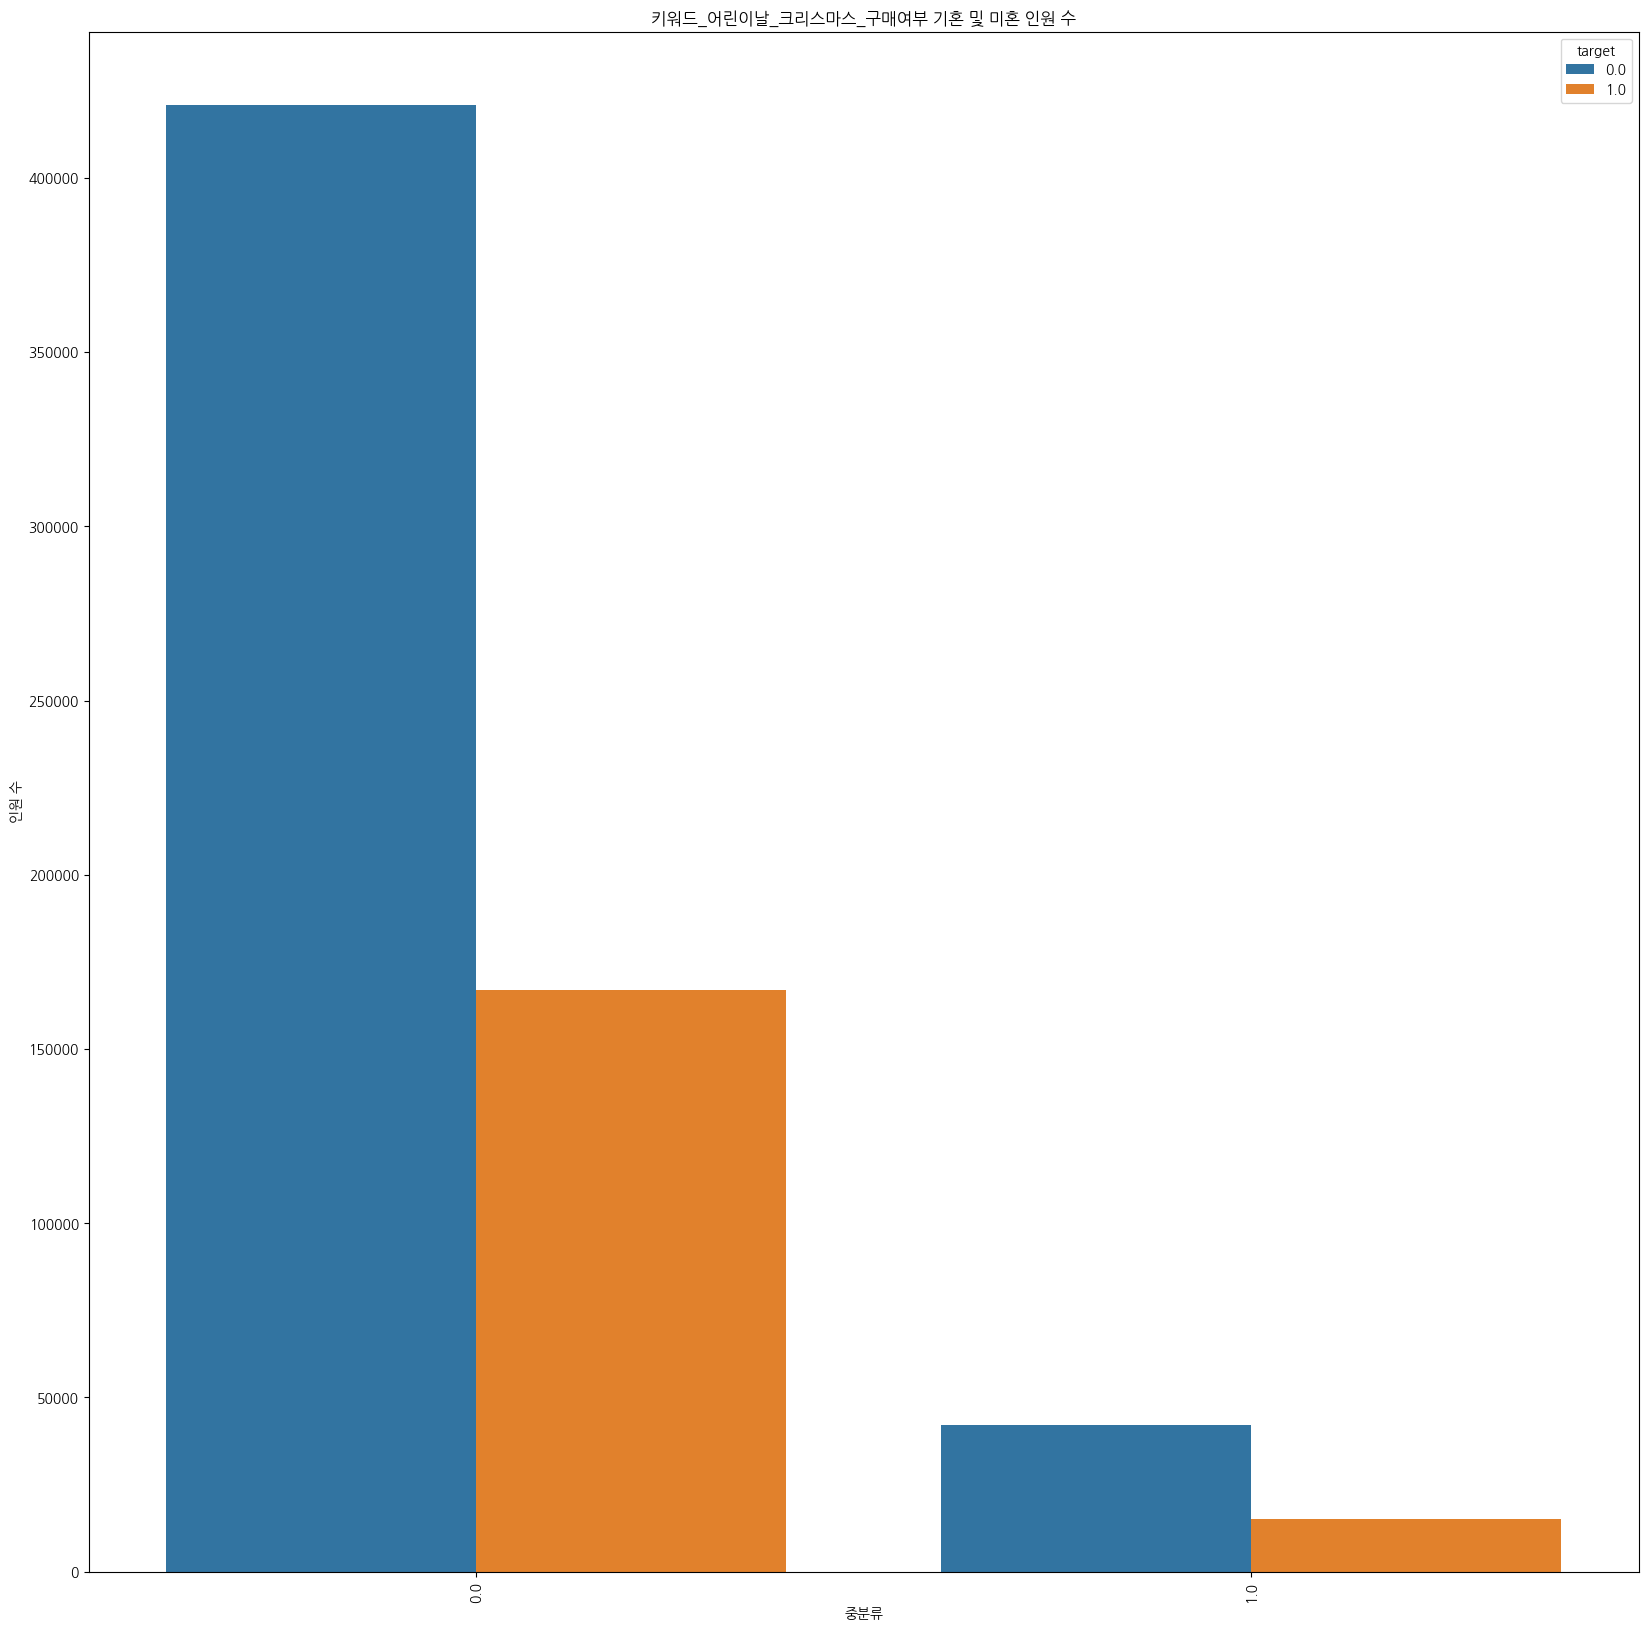

In [68]:
plt.figure(figsize=(20,20))
sns.countplot(data=merged_df, x='키워드_어린이날_크리스마스_구매여부', hue='target')

plt.title('키워드_어린이날_크리스마스_구매여부 기혼 및 미혼 인원 수')
plt.xticks(rotation=90)
plt.xlabel('중분류')
plt.ylabel('인원 수')
plt.show()

In [73]:
# 상관관계 계산
correlation = merged_df[['키워드_어린이날_크리스마스_구매여부', 'target']].corr().iloc[0, 1]

print(f"상관계수: {correlation}")


상관계수: -0.012632268059326419


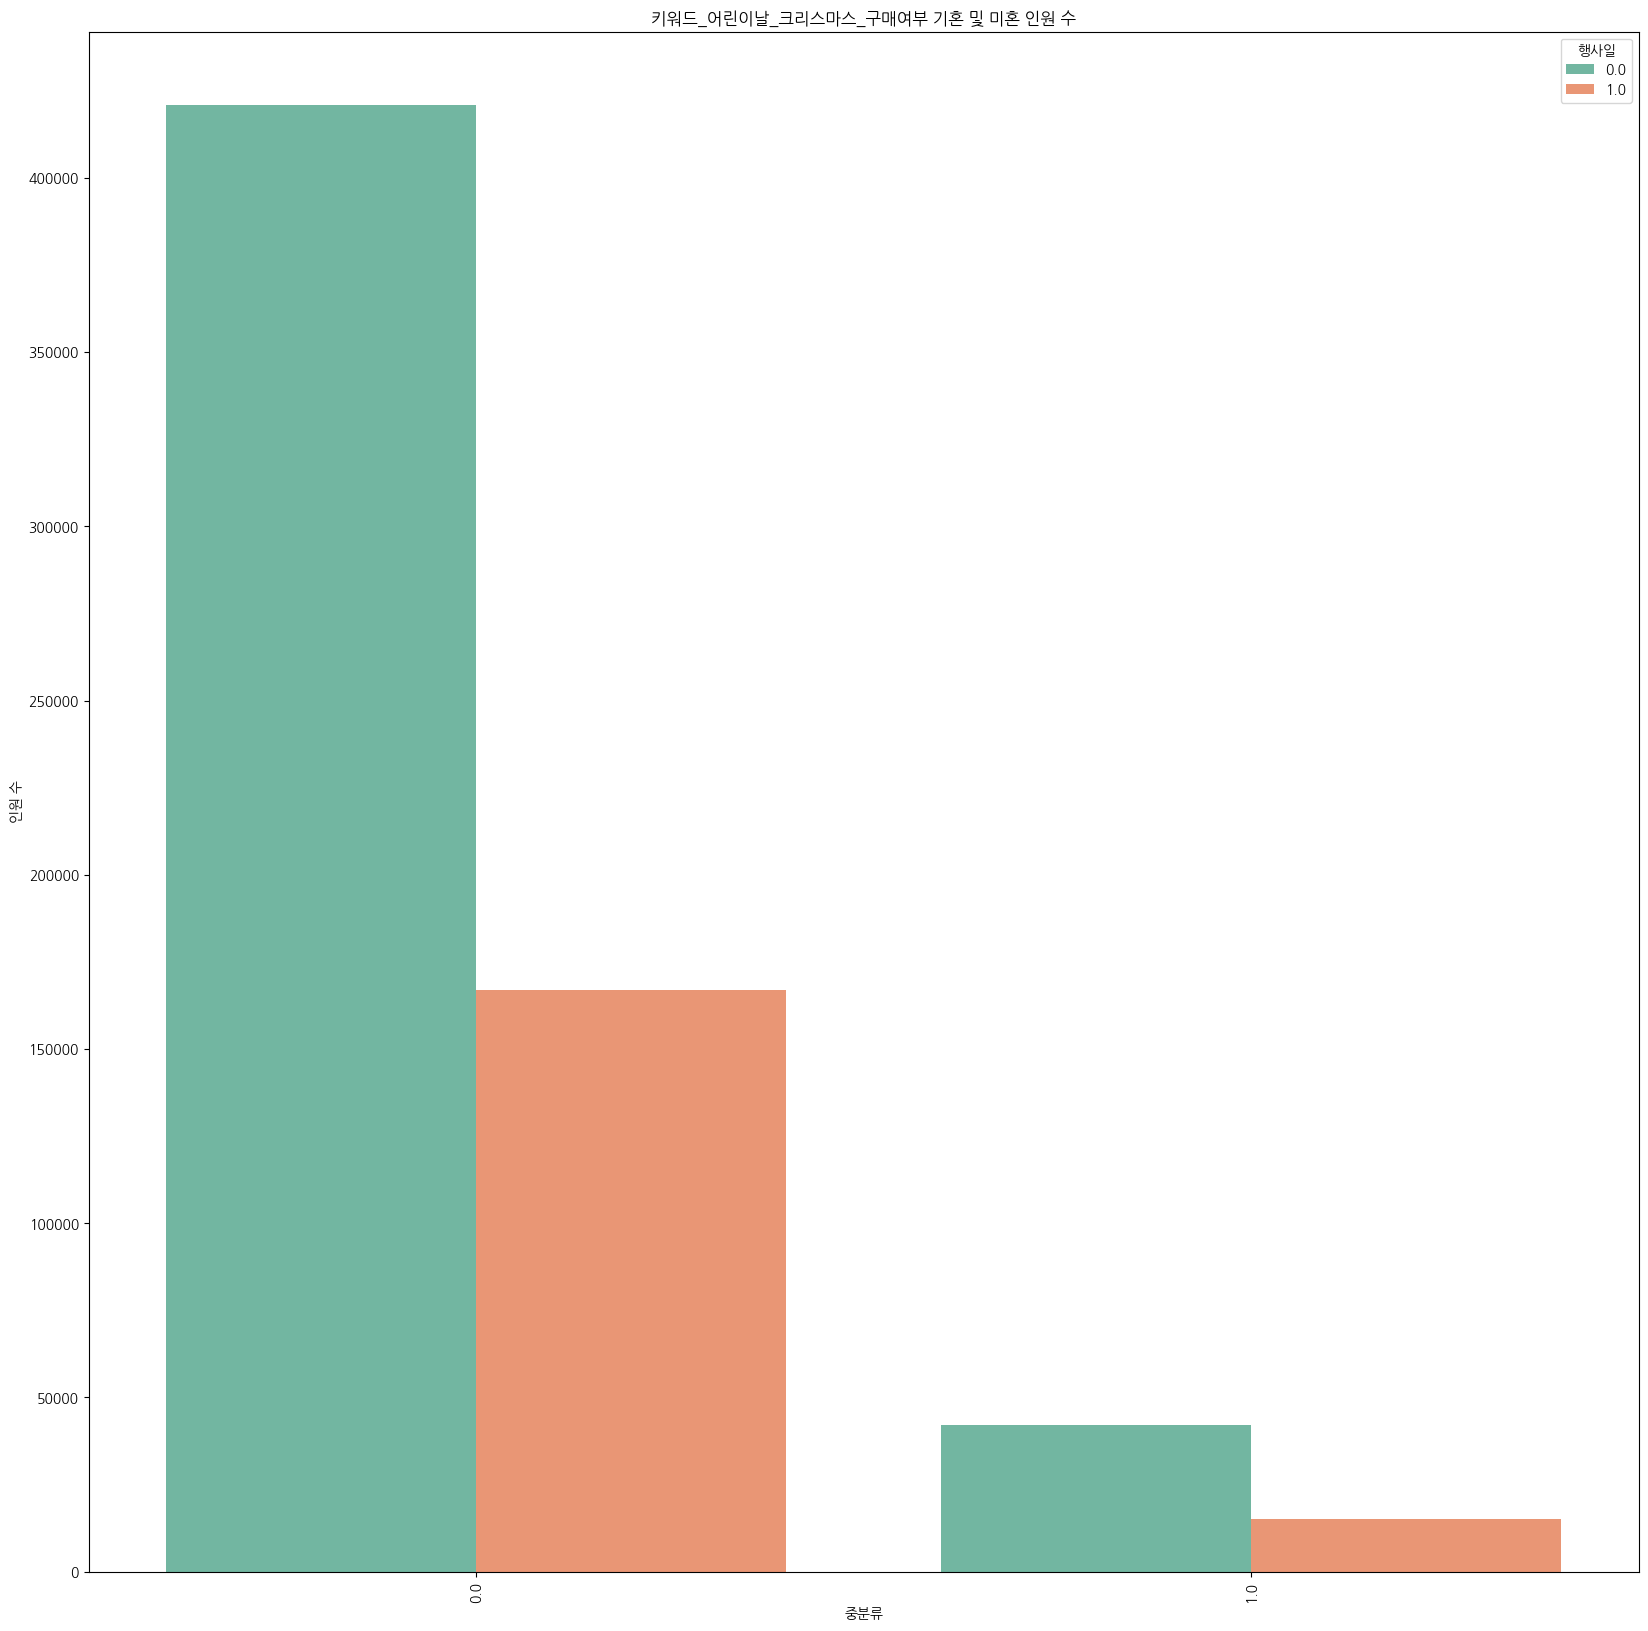

In [69]:
# 구매일시를 기반으로 어린이 날과 크리스마스 구분
merged_df['구매일'] = pd.to_datetime(merged_df['구매일시']).dt.date
merged_df['행사일'] = merged_df['구매일'].apply(lambda x: '어린이날' if x == pd.to_datetime('2004-05-05').date() else ('크리스마스' if x == pd.to_datetime('2004-12-25').date() else '기타'))

# 그래프를 그립니다.
plt.figure(figsize=(20,20))
sns.countplot(data=merged_df, x='키워드_어린이날_크리스마스_구매여부', hue='target', palette='Set2')

plt.title('키워드_어린이날_크리스마스_구매여부 기혼 및 미혼 인원 수')
plt.xticks(rotation=90)
plt.xlabel('중분류')
plt.ylabel('인원 수')
plt.legend(title='행사일')
plt.show()


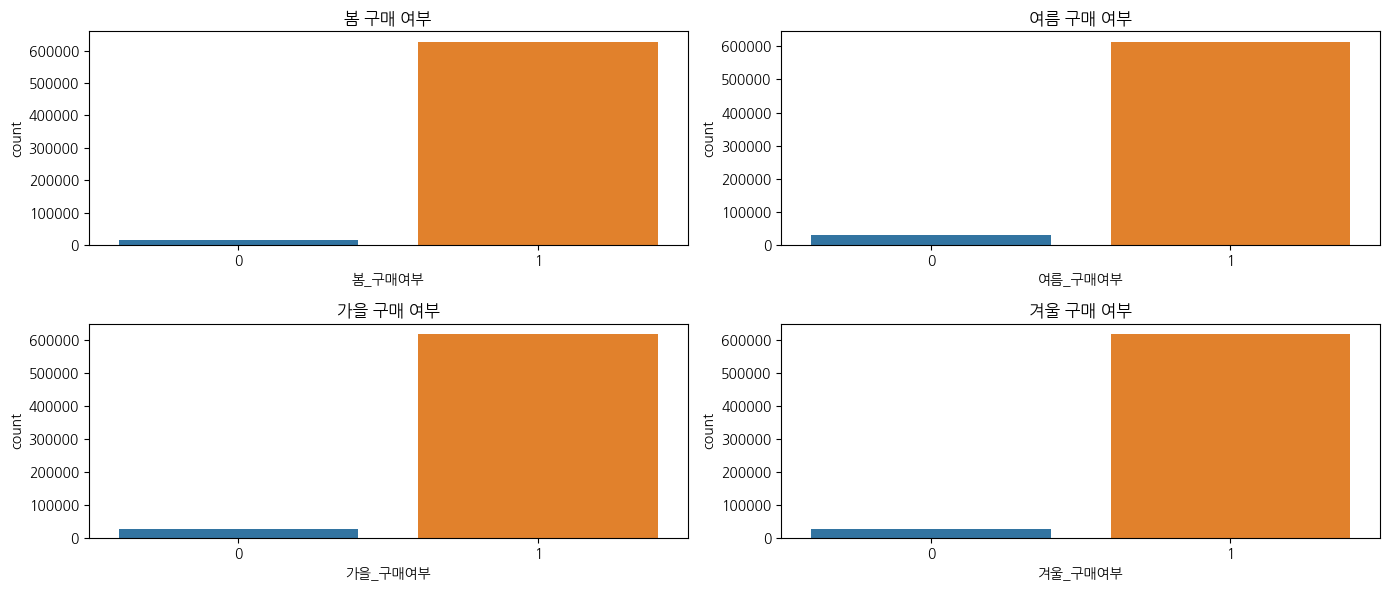

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# 0과 1로 이진화된 새로운 열 생성
merged_df['봄_구매여부'] = (merged_df['봄_총구매금액'] > 0).astype(int)
merged_df['여름_구매여부'] = (merged_df['여름_총구매금액'] > 0).astype(int)
merged_df['가을_구매여부'] = (merged_df['가을_총구매금액'] > 0).astype(int)
merged_df['겨울_구매여부'] = (merged_df['겨울_총구매금액'] > 0).astype(int)

# 계절별 구매 여부의 분포를 시각화
plt.figure(figsize=(14, 6))

plt.subplot(2, 2, 1)
sns.countplot(x='봄_구매여부', data=merged_df)
plt.title('봄 구매 여부')

plt.subplot(2, 2, 2)
sns.countplot(x='여름_구매여부', data=merged_df)
plt.title('여름 구매 여부')

plt.subplot(2, 2, 3)
sns.countplot(x='가을_구매여부', data=merged_df)
plt.title('가을 구매 여부')

plt.subplot(2, 2, 4)
sns.countplot(x='겨울_구매여부', data=merged_df)
plt.title('겨울 구매 여부')

plt.tight_layout()
plt.show()


In [72]:
# 상관 계수를 계산하기 전에 '미혼_기혼'이라는 타겟 변수를 데이터프레임에 추가하는 코드가 필요합니다.
# 여기서는 타겟 변수가 merged_df 데이터프레임의 'target' 열에 있다고 가정하고 코드를 작성합니다.

# 'target' 열과 계절별 구매여부 간의 상관계수를 계산합니다.
correlations = merged_df[['봄_구매여부', '여름_구매여부', '가을_구매여부', '겨울_구매여부', 'target']].corr()

# 'target'과의 상관 관계만을 출력합니다.
correlations_target = correlations['target'].sort_values(ascending=False)
correlations_target


target     1.000000
겨울_구매여부   -0.045321
봄_구매여부    -0.048233
가을_구매여부   -0.066912
여름_구매여부   -0.115222
Name: target, dtype: float64

In [1]:
merged_df

NameError: name 'merged_df' is not defined

In [6]:
merged_df['날짜'] = merged_df['구매일시'].dt.date
merged_df['시간'] = merged_df['구매일시'].dt.time

# 날짜 순서로 정렬
merged_df.sort_values(by=['ID', '날짜'], inplace=True)

# ID별로 최대 연속 방문일 계산
merged_df['날짜'] = pd.to_datetime(merged_df['날짜'])  # '날짜' 열을 datetime 형식으로 변환
merged_df['날짜차이'] = merged_df.groupby('ID')['날짜'].diff().fillna(pd.Timedelta(seconds=0))
merged_df['연속방문일수'] = (merged_df['날짜차이'] > pd.Timedelta(days=1)).cumsum() + 1

# 결과 출력
print(merged_df[['ID', '날짜', '연속방문일수']])

                ID         날짜  연속방문일수
11309      train_0 2004-05-07       1
53918      train_0 2004-06-05       2
53956      train_0 2004-06-05       2
70074      train_0 2004-06-14       3
141650     train_0 2004-07-29       4
...            ...        ...     ...
419823  train_9999 2005-02-23  223971
419926  train_9999 2005-02-23  223971
470577  train_9999 2005-04-01  223972
470701  train_9999 2005-04-01  223972
521810  train_9999 2005-04-29  223973

[523105 rows x 3 columns]


In [9]:
merged_df['날짜차이'] = merged_df.groupby('ID')['날짜'].diff().fillna(pd.Timedelta(seconds=0))
merged_df['연속방문일수'] = (merged_df['날짜차이'] > pd.Timedelta(days=1)).cumsum() + 1

# 결과 출력
print(merged_df[['ID', '날짜', '연속방문일수']])

                ID         날짜  연속방문일수
11309      train_0 2004-05-07       1
53918      train_0 2004-06-05       2
53956      train_0 2004-06-05       2
70074      train_0 2004-06-14       3
141650     train_0 2004-07-29       4
...            ...        ...     ...
419823  train_9999 2005-02-23  223971
419926  train_9999 2005-02-23  223971
470577  train_9999 2005-04-01  223972
470701  train_9999 2005-04-01  223972
521810  train_9999 2005-04-29  223973

[523105 rows x 3 columns]


In [11]:
merged_df

,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격,target,날짜,시간,날짜차이,연속방문일수,요일
11309,train_0,2004-05-07 18:23:00,A112000,패션잡화,양말,5659,43500,1.0,2004-05-07,18:23:00,0 days,1,4
53918,train_0,2004-06-05 12:10:00,A144000,가정용품파트,상품군미지정,5405,1000000,1.0,2004-06-05,12:10:00,29 days,2,5
53956,train_0,2004-06-05 12:20:00,A144000,가정용품파트,상품군미지정,5405,430000,1.0,2004-06-05,12:20:00,0 days,2,5
70074,train_0,2004-06-14 13:50:00,A144000,잡화파트,썬그라스,5578,320000,1.0,2004-06-14,13:50:00,9 days,3,0
141650,train_0,2004-07-29 17:13:00,A112000,패션잡화,싸롱화,5379,165000,1.0,2004-07-29,17:13:00,45 days,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
419823,train_9999,2005-02-23 14:20:00,A112000,남성의류,캐릭터,5896,20000,0.0,2005-02-23,14:20:00,0 days,223971,2
419926,train_9999,2005-02-23 15:00:00,A112000,남성의류,캐릭터,5365,109000,0.0,2005-02-23,15:00:00,0 days,223971,2
470577,train_9999,2005-04-01 18:40:00,A112000,가정용품,소형취사가전,5281,86400,0.0,2005-04-01,18:40:00,37 days,223972,4
470701,train_9999,2005-04-01 19:13:00,A112000,패션잡화,수입종합화장품,5112,78000,0.0,2005-04-01,19:13:00,0 days,223972,4


In [12]:
df=merged_df

In [13]:
df['요일'] = df['날짜'].dt.dayofweek

# '평일 방문' 열을 추가하여 평일(월요일부터 금요일까지) 방문 여부 저장 (1: 평일 방문, 0: 주말 방문)
df['평일 방문'] = (df['요일'] >= 0) & (df['요일'] <= 4)

# 데이터를 ID로 그룹화하고 각 그룹에 대해 평일 방문 주기를 계산
평일_방문_주기 = df.groupby('ID')['평일 방문'].diff().fillna(0).cumsum()

# 결과를 데이터프레임에 추가
df['평일 방문 주기'] = 평일_방문_주기

# 각 유저(ID)별로 최종 결과를 확인
print(df[['ID', '날짜', '평일 방문', '평일 방문 주기']])

                ID         날짜  평일 방문  평일 방문 주기
11309      train_0 2004-05-07   True         0
53918      train_0 2004-06-05  False        -1
53956      train_0 2004-06-05  False        -1
70074      train_0 2004-06-14   True         0
141650     train_0 2004-07-29   True         0
...            ...        ...    ...       ...
419823  train_9999 2005-02-23   True      1216
419926  train_9999 2005-02-23   True      1216
470577  train_9999 2005-04-01   True      1216
470701  train_9999 2005-04-01   True      1216
521810  train_9999 2005-04-29   True      1216

[523105 rows x 4 columns]


In [17]:
correlation = np.corrcoef(df['평일 방문'], df['target'])[0, 1]

# 결과 출력
print(f"평일 방문와 target 간의 상관 계수: {correlation}")

평일 방문와 target 간의 상관 계수: 0.01595888177007613


In [62]:
big_keywords=['가정용품파트', '공산품파트', '남성정장스포츠', '로얄부띠끄', '로얄부틱', '생식품', '생식품파트', '아동문화', '여성정장']

In [63]:
middle_keywords=['GBR  지원','TV.VTR','TV_VTR','가스렌지','가전특정','건강용품', '건식품', '건어물', '곡물', '골프(LC)', '골프(NB)', '골프(국내)', '골프(단품)', '골프(수입)', '골프(용품)', '골프단품', '골프웨어', '과자', '교복행사', '구두수선', '국내부띠끄', '기타식품', '내셔날', '내셔널', '냉난방', '냉동식품', '냉장고_세탁기', '냉장식품', '니트', '단품(트래디셔널)', '단품행사', '디자이너니트',
'디자이너부띠끄', '디자이너숍', '디자이너캐릭터', '라디오.카세트', '라이센스', '레이디숍A', '레포츠',
'레포츠단품', '로얄부틱2F', '로얄수입행사', '마춤', '면류', '모피.피혁', '모피_피혁', '문구', '문화', '부띠끄', '부띠끄행사', '상품개발지원', '생선', '세탁기_냉장고', '소파', '소형가구(가구)', '쇼파', '수예',
 '수예침장','수예행사','수입_종합가구','수입구두','수입도자기','수입부띠끄','수입슈즈','수입캐주얼','수입피혁','슈즈','스포츠단품',
 '아동','아동단품',
 '아동복','아동잡화',
 '아동특선', '야채',
 '엘레강스','엘레강스부틱','영잡화',
 '완구','용기보증',
 '용품','원목(주니어)','유아','음료','의류기타',
 '인스탄트식품','임대골프', '잡화토탈',
 '전문가구(가구)',
'전화기',
'정육',
'조명',
 '조미료','종합_수입','주방용품',
 '지갑_벨트','직수입침구','청과','침구','침대',
 '카세트_전화기', '카페트',
 '카페트_대자리',
'캐쥬얼단품',
'크리스탈',
'타운','타운단품',
 '통병조림',
'통판',
 '트래디셔널캐쥬얼','특선행사','특판','페레  지원','피혁A행사','해외SHOP','행사_단품','행사구두(5F)','훼미닌부틱']

In [37]:
purchase_counts = df[(df['대분류'].isin(big_keywords)) & (df['중분류'].isin(middle_keywords))]
purchase_counts = purchase_counts.groupby(['ID', '지점코드']).size().reset_index(name='구매횟수')


In [38]:
purchase_counts

,ID,지점코드,구매횟수
0,train_0,A112000,4
1,train_0,A144000,11
2,train_1,A112000,3
3,train_1,A144000,1
4,train_1,A373000,2
...,...,...,...
17273,train_9994,A144000,43
17274,train_9996,A144000,5
17275,train_9997,A112000,5
17276,train_9998,A112000,9


In [39]:
merged_df = pd.merge(merged_df, purchase_counts, on='ID')

In [45]:
merged_df

,ID,구매일시,지점코드_x,대분류,중분류,브랜드코드,구매가격,target,날짜,시간,날짜차이,연속방문일수,요일,평일 방문,평일 방문 주기,지점코드_y,구매횟수_x,지점코드,구매횟수_y
0,train_0,2004-05-07 18:23:00,A112000,패션잡화,양말,5659,43500,1.0,2004-05-07,18:23:00,0 days,1,4,True,0,A112000,2,A112000,4
1,train_0,2004-05-07 18:23:00,A112000,패션잡화,양말,5659,43500,1.0,2004-05-07,18:23:00,0 days,1,4,True,0,A112000,2,A144000,11
2,train_0,2004-05-07 18:23:00,A112000,패션잡화,양말,5659,43500,1.0,2004-05-07,18:23:00,0 days,1,4,True,0,A144000,8,A112000,4
3,train_0,2004-05-07 18:23:00,A112000,패션잡화,양말,5659,43500,1.0,2004-05-07,18:23:00,0 days,1,4,True,0,A144000,8,A144000,11
4,train_0,2004-06-05 12:10:00,A144000,가정용품파트,상품군미지정,5405,1000000,1.0,2004-06-05,12:10:00,29 days,2,5,False,-1,A112000,2,A112000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057049,train_9998,2005-04-02 16:53:00,A112000,패션잡화,수입종합화장품,5149,33000,0.0,2005-04-02,16:53:00,0 days,223956,5,False,1216,A112000,8,A112000,9
1057050,train_9998,2005-04-23 15:40:00,A112000,스포츠캐쥬얼,트레디셔널캐주얼,5138,164000,0.0,2005-04-23,15:40:00,21 days,223957,5,False,1216,A112000,8,A112000,9
1057051,train_9998,2005-04-23 16:00:00,A112000,여성캐주얼,란제리,5165,24000,0.0,2005-04-23,16:00:00,0 days,223957,5,False,1216,A112000,8,A112000,9
1057052,train_9998,2005-04-23 16:13:00,A112000,패션잡화,수입종합화장품,5303,114000,0.0,2005-04-23,16:13:00,0 days,223957,5,False,1216,A112000,8,A112000,9


In [53]:
correlation = np.corrcoef(merged_df['키워드_지점_구매횟수'], merged_df['target'])[0, 1]

# 결과 출력
print(f"구매횟수_x와 target 간의 상관 계수: {correlation}")

구매횟수_x와 target 간의 상관 계수: -0.15699224369452683


In [52]:
purchase_counts

,ID,지점코드,키워드_지점_구매횟수
0,train_0,A112000,20
1,train_0,A144000,20
2,train_1,A112000,4
3,train_1,A144000,4
4,train_1,A373000,4
...,...,...,...
13686,train_9993,A112000,1
13687,train_9994,A144000,31
13688,train_9996,A144000,1
13689,train_9997,A112000,4


In [51]:
filtered_purchase_counts = merged_df[merged_df['대분류'].isin(big_keywords) & merged_df['중분류'].isin(middle_keywords)]
purchase_counts = filtered_purchase_counts.groupby(['ID', '지점코드']).size().reset_index(name='키워드_지점_구매횟수')

# 결과와 원본 데이터프레임 병합
# 병합 시, 각 ID와 지점코드에 대해 구매횟수를 매핑합니다. 없는 경우에는 0으로 채웁니다.
# Perform the merge operation without fillna
merged_df = merged_df.merge(purchase_counts, on=['ID', '지점코드'], how='left')

# Specify the columns where NaNs should be replaced with zeros
# Assuming '키워드_지점_구매횟수' is the only column with NaNs that should be zeros
merged_df['키워드_지점_구매횟수'] = merged_df['키워드_지점_구매횟수'].fillna(0).astype(int)

# Now the rest of the DataFrame is intact, and only the specified column(s) have been altered
merged_df

,ID,구매일시,지점코드_x,대분류,중분류,브랜드코드,구매가격,target,날짜,시간,날짜차이,연속방문일수,요일,평일 방문,평일 방문 주기,지점코드_y,구매횟수_x,지점코드,구매횟수_y,키워드_지점_구매횟수
0,train_0,2004-05-07 18:23:00,A112000,패션잡화,양말,5659,43500,1.0,2004-05-07,18:23:00,0 days,1,4,True,0,A112000,2,A112000,4,20
1,train_0,2004-05-07 18:23:00,A112000,패션잡화,양말,5659,43500,1.0,2004-05-07,18:23:00,0 days,1,4,True,0,A112000,2,A144000,11,20
2,train_0,2004-05-07 18:23:00,A112000,패션잡화,양말,5659,43500,1.0,2004-05-07,18:23:00,0 days,1,4,True,0,A144000,8,A112000,4,20
3,train_0,2004-05-07 18:23:00,A112000,패션잡화,양말,5659,43500,1.0,2004-05-07,18:23:00,0 days,1,4,True,0,A144000,8,A144000,11,20
4,train_0,2004-06-05 12:10:00,A144000,가정용품파트,상품군미지정,5405,1000000,1.0,2004-06-05,12:10:00,29 days,2,5,False,-1,A112000,2,A112000,4,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057049,train_9998,2005-04-02 16:53:00,A112000,패션잡화,수입종합화장품,5149,33000,0.0,2005-04-02,16:53:00,0 days,223956,5,False,1216,A112000,8,A112000,9,8
1057050,train_9998,2005-04-23 15:40:00,A112000,스포츠캐쥬얼,트레디셔널캐주얼,5138,164000,0.0,2005-04-23,15:40:00,21 days,223957,5,False,1216,A112000,8,A112000,9,8
1057051,train_9998,2005-04-23 16:00:00,A112000,여성캐주얼,란제리,5165,24000,0.0,2005-04-23,16:00:00,0 days,223957,5,False,1216,A112000,8,A112000,9,8
1057052,train_9998,2005-04-23 16:13:00,A112000,패션잡화,수입종합화장품,5303,114000,0.0,2005-04-23,16:13:00,0 days,223957,5,False,1216,A112000,8,A112000,9,8


In [85]:
train_trans[train_trans['대분류'].isin(big_keywords)]

,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격
0,train_13219,2004-05-01 09:40:00,A144000,공산품파트,차류,5100,59700
4,train_10851,2004-05-01 10:30:00,A112000,가정용품,전화기_카세트,5110,215000
5,train_10809,2004-05-01 10:30:00,A112000,가정용품,전화기_카세트,5110,319000
20,train_1960,2004-05-01 10:50:00,A112000,가정용품,TV_VCR,5136,600000
21,train_7425,2004-05-01 10:50:00,A144000,공산품파트,용기보증,5100,40116
...,...,...,...,...,...,...,...
523088,train_1211,2005-04-29 19:40:00,A112000,가정용품,상품군미지정,5117,30000
523090,train_14054,2005-04-29 19:40:00,A144000,공산품파트,용기보증,5100,27370
523091,train_14054,2005-04-29 19:40:00,A144000,공산품파트,일반조리,5100,11504
523092,train_14054,2005-04-29 19:40:00,A144000,공산품파트,과자류,5100,7900


In [150]:
s=train_trans[train_trans['대분류'].isin(big_keywords)].groupby(['ID', '지점코드']).size().reset_index(name='대분류_키워드_구매횟수')
s.pivot(index='ID', columns='지점코드', values=['대분류_키워드_구매횟수'])
s=s.pivot(index='ID', columns='지점코드', values=['대분류_키워드_구매횟수'])
s.columns = [f'{col[0]}_{col[1]}' for col in s.columns]
s.fillna(0)

,대분류_키워드_구매횟수_A112000,대분류_키워드_구매횟수_A144000,대분류_키워드_구매횟수_A202000,대분류_키워드_구매횟수_A373000
ID,,,,
train_0,2.0,0.0,0.0,0.0
train_1,0.0,1.0,0.0,0.0
train_10,0.0,50.0,0.0,0.0
train_100,2.0,0.0,0.0,0.0
train_10000,0.0,0.0,1.0,0.0
...,...,...,...,...
train_9991,4.0,4.0,0.0,1.0
train_9992,0.0,0.0,4.0,0.0
train_9994,0.0,21.0,0.0,0.0


In [135]:
merged_df = merged_df.merge(s, how='left', on='ID')
merged_df = merged_df.fillna(0)

In [136]:
merged_df

,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격,target,대분류_키워드_구매횟수_A112000,대분류_키워드_구매횟수_A144000,대분류_키워드_구매횟수_A202000,대분류_키워드_구매횟수_A373000
0,train_13219,2004-05-01 09:40:00,A144000,공산품파트,차류,5100,59700,0.0,0.0,5.0,0.0,0.0
1,train_5590,2004-05-01 09:40:00,A144000,잡화파트,화장잡화,5101,17000,0.0,0.0,1.0,0.0,0.0
2,train_7200,2004-05-01 10:20:00,A112000,공산품,용기보증,5100,34937,0.0,2.0,0.0,0.0,0.0
3,train_3010,2004-05-01 10:30:00,A373000,아동_스포츠,아동복,5105,19000,0.0,0.0,0.0,0.0,0.0
4,train_10851,2004-05-01 10:30:00,A112000,가정용품,전화기_카세트,5110,215000,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
523100,train_330,2005-04-29 19:53:00,A112000,영캐릭터,트렌드캐주얼,5882,484000,1.0,0.0,0.0,0.0,0.0
523101,train_9738,2005-04-29 19:54:00,A373000,아동_스포츠,상품군미지정,5191,144000,0.0,0.0,0.0,0.0,0.0
523102,train_10787,2005-04-29 20:00:00,A112000,공산품,음료,5100,8340,1.0,0.0,0.0,0.0,0.0
523103,train_13129,2005-04-29 20:00:00,A112000,생식품,용기보증,5100,23170,0.0,0.0,0.0,0.0,0.0


In [151]:

user_visit_counts = merged_df.groupby('ID')['지점코드'].count()


user_location_counts = merged_df.groupby(['ID', '지점코드']).size()

# 각 유저별로 지점코드에 대한 방문 비율 계산
user_location_visit_ratio = user_location_counts / user_visit_counts

# 결과를 데이터프레임으로 변환
result_df = user_location_visit_ratio.reset_index(name='방문비율')

result_df = result_df.pivot(index='ID', columns='지점코드', values='방문비율').reset_index().fillna(0)

# 컬럼 이름 변경
result_df = result_df.rename(columns=lambda x: f'{x}_방문비율' if x != 'ID' else x)

In [153]:
merged_df = merged_df.merge(result_df, how='left', on='ID')

In [154]:
merged_df

,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격,target,대분류_키워드_구매횟수_A112000,대분류_키워드_구매횟수_A144000,대분류_키워드_구매횟수_A202000,대분류_키워드_구매횟수_A373000,A112000_방문비율,A144000_방문비율,A202000_방문비율,A373000_방문비율
0,train_13219,2004-05-01 09:40:00,A144000,공산품파트,차류,5100,59700,0.0,0.0,5.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000
1,train_5590,2004-05-01 09:40:00,A144000,잡화파트,화장잡화,5101,17000,0.0,0.0,1.0,0.0,0.0,0.036585,0.939024,0.000000,0.024390
2,train_7200,2004-05-01 10:20:00,A112000,공산품,용기보증,5100,34937,0.0,2.0,0.0,0.0,0.0,0.709091,0.290909,0.000000,0.000000
3,train_3010,2004-05-01 10:30:00,A373000,아동_스포츠,아동복,5105,19000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.935484,0.064516
4,train_10851,2004-05-01 10:30:00,A112000,가정용품,전화기_카세트,5110,215000,0.0,1.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523100,train_330,2005-04-29 19:53:00,A112000,영캐릭터,트렌드캐주얼,5882,484000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000
523101,train_9738,2005-04-29 19:54:00,A373000,아동_스포츠,상품군미지정,5191,144000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000
523102,train_10787,2005-04-29 20:00:00,A112000,공산품,음료,5100,8340,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000
523103,train_13129,2005-04-29 20:00:00,A112000,생식품,용기보증,5100,23170,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000


In [155]:
keywords = ['A112000', 'A144000', 'A202000', 'A373000']
for keyword in keywords:
    merged_df[f'대분류_키워드_선형값_{keyword}'] = (merged_df[f'대분류_키워드_구매횟수_{keyword}'] * merged_df[f'{keyword}_방문비율'])+(merged_df[f'중분류_키워드_구매횟수_{keyword}'] * merged_df[f'{keyword}_방문비율'])

In [158]:
keywords = ['A112000', 'A144000', 'A202000', 'A373000']
values = [] 

for keyword in keywords:
    value = (merged_df[f'대분류_키워드_구매횟수_{keyword}'] * merged_df[f'{keyword}_방문비율'])
    values.append(value)
    
merged_df[f'키워드_지점_선형값']=sum(values)

In [159]:
merged_df

,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격,target,대분류_키워드_구매횟수_A112000,대분류_키워드_구매횟수_A144000,...,대분류_키워드_구매횟수_A373000,A112000_방문비율,A144000_방문비율,A202000_방문비율,A373000_방문비율,대분류_키워드_선형값_A112000,대분류_키워드_선형값_A144000,대분류_키워드_선형값_A202000,대분류_키워드_선형값_A373000,키워드_지점_선형값
0,train_13219,2004-05-01 09:40:00,A144000,공산품파트,차류,5100,59700,0.0,0.0,5.0,...,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.0,0.0,5.000000
1,train_5590,2004-05-01 09:40:00,A144000,잡화파트,화장잡화,5101,17000,0.0,0.0,1.0,...,0.0,0.036585,0.939024,0.000000,0.024390,0.000000,0.939024,0.0,0.0,0.939024
2,train_7200,2004-05-01 10:20:00,A112000,공산품,용기보증,5100,34937,0.0,2.0,0.0,...,0.0,0.709091,0.290909,0.000000,0.000000,1.418182,0.000000,0.0,0.0,1.418182
3,train_3010,2004-05-01 10:30:00,A373000,아동_스포츠,아동복,5105,19000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.935484,0.064516,0.000000,0.000000,0.0,0.0,0.000000
4,train_10851,2004-05-01 10:30:00,A112000,가정용품,전화기_카세트,5110,215000,0.0,1.0,0.0,...,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523100,train_330,2005-04-29 19:53:00,A112000,영캐릭터,트렌드캐주얼,5882,484000,1.0,0.0,0.0,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
523101,train_9738,2005-04-29 19:54:00,A373000,아동_스포츠,상품군미지정,5191,144000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000
523102,train_10787,2005-04-29 20:00:00,A112000,공산품,음료,5100,8340,1.0,0.0,0.0,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
523103,train_13129,2005-04-29 20:00:00,A112000,생식품,용기보증,5100,23170,0.0,0.0,0.0,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000


In [90]:
s=train_trans[train_trans['중분류'].isin(middle_keywords)].groupby(['ID', '지점코드']).size().reset_index(name='중분류_구매횟수')
s.pivot(index='ID', columns='지점코드', values=['중분류_구매횟수'])

중분류_구매횟수                        
지점코드         A112000 A144000 A202000 A373000
ID                                          
train_0          1.0     NaN     NaN     NaN
train_10         NaN     1.0     NaN     NaN
train_10007      NaN     NaN     1.0     NaN
train_10017      NaN     NaN     NaN     1.0
train_10024      NaN     1.0     NaN     NaN
...              ...     ...     ...     ...
train_9975       1.0     NaN     NaN     NaN
train_9980       NaN     NaN     NaN     1.0
train_9982       NaN     1.0     NaN     NaN
train_9991       NaN     NaN     NaN     3.0
train_9992       NaN     NaN     2.0     NaN

[1816 rows x 4 columns]

In [ ]:
대분류_키워드_구매횟수_A112000	대분류_키워드_구매횟수_A144000	대분류_키워드_구매횟수_A202000	대분류_키워드_구매횟수_A373000

In [141]:
correlation = np.corrcoef(merged_df['대분류_키워드_구매횟수_A202000'], merged_df['target'])[0, 1]

# 결과 출력
print(f"구매횟수_x와 target 간의 상관 계수: {correlation}")

구매횟수_x와 target 간의 상관 계수: -0.04494509367325837
